# Combining all Data

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Set the path to your folder containing CSV files
folder_path_sensors = "/Users/jakobkuemmerle/Documents/CDL/API_AIR"
folder_path_weather = "/Users/jakobkuemmerle/Documents/CDL/Weather_API"

# Sensor Data
### 1. Read all csv files with Sensor Data

In [48]:
import os
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path_sensors) if file.endswith(".csv")]

# Loop through each CSV file and append its data to the list of DataFrames
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path_sensors, csv_file))

    # Add a new column with the file name (without .csv extension)
    df['sensor_id'] = os.path.splitext(csv_file)[0]
    
    # Rename 'time_stamp' to 'date'
    df = df.rename(columns={'time_stamp': 'date'})

    # Convert 'date' to datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # Append the DataFrame to the list
    dfs.append(df)

In [49]:
# Concatenate all DataFrames in the list into a single DataFrame
sensor_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
sensor_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
0 2020-10-11    35.819       80.364   957.176        1.4   
1 2020-11-28    23.821       80.692   961.921        1.2   
2 2020-10-17    17.943       89.671   954.660        0.5   
3 2020-09-24    30.565       85.556   956.637        1.2   
4 2020-12-06    26.742       83.439   963.470        4.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.5         254.1       296.972         0.321   
1                     4.2         260.0       277.775         0.216   
2                     1.6         328.2       104.678         0.267   
3                     4.2         258.7       281.900         0.241   
4                    14.7         141.2       979.037         0.951   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm sensor_id  
0      0.982      1.657       1.657       1.860     66849  
1      0.737      1.197       1.197       1.333     66849  
2      0.099      0.277       0.277       0.422     66849  
3      0.877      1.294       1.294       1.430     66849  
4      4.754      7.485       7.485       8.104     66849

### 2. Stats and decription

In [50]:
sensor_df.describe()

date      humidity   temperature  \
count                          22304  22304.000000  2.230400e+04   
mean   2021-07-20 16:22:46.140602624     33.188816  6.971777e+02   
min              2018-01-10 00:00:00      0.000000  0.000000e+00   
25%              2020-05-12 00:00:00     23.013000  5.668950e+01   
50%              2021-08-28 00:00:00     31.473500  6.942300e+01   
75%              2022-10-30 00:00:00     42.887000  8.111000e+01   
max              2023-11-26 00:00:00    100.000000  2.324186e+06   
std                              NaN     14.292179  3.566561e+04   

           pressure     pm2.5_alt  scattering_coefficient  visual_range  \
count  22304.000000  22304.000000            22304.000000  22304.000000   
mean     887.664871      7.395884               22.688926    181.668288   
min        0.000000      0.000000                0.000000      0.000000   
25%      875.140500      1.300000                4.800000    118.100000   
50%      956.778500      2.600000                9.800000    179.700000   
75%      975.105750      5.300000               19.200000    246.900000   
max     1021.832000    854.600000              972.500000    381.900000   
std      204.378174     24.196773               53.313332     85.635260   

       0.3_um_count  5.0_um_count     pm1.0_atm     pm2.5_atm    pm2.5_cf_1  \
count  22304.000000  22304.000000  22304.000000  22304.000000  22304.000000   
mean    1512.602750      2.074066      8.994910     13.043425     16.888736   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      321.765125      0.310000      0.877000      1.481000      1.495375   
50%      650.051000      0.555500      2.574250      3.874250      3.907500   
75%     1278.755125      1.141125      5.869875      8.832625      9.043875   
max    64832.315000    625.403500   1815.447000   1816.865000   2723.638500   
std     3554.204801     11.836599     65.532754     69.786908    104.574789   

         pm10.0_atm  
count  22304.000000  
mean      13.990670  
min        0.000000  
25%        1.610875  
50%        4.146750  
75%        9.433875  
max     1817.453500  
std       71.890378

In [51]:
sensor_df.shape

(22304, 14)

In [52]:
sensor_df.dtypes

date                      datetime64[ns]
humidity                         float64
temperature                      float64
pressure                         float64
pm2.5_alt                        float64
scattering_coefficient           float64
visual_range                     float64
0.3_um_count                     float64
5.0_um_count                     float64
pm1.0_atm                        float64
pm2.5_atm                        float64
pm2.5_cf_1                       float64
pm10.0_atm                       float64
sensor_id                         object
dtype: object

In [53]:
# Count the number of rows with value 0.000 for each column
zero_count_per_column = (sensor_df == 0.000).sum()

# Display the result
print(zero_count_per_column)

date                         0
humidity                   540
temperature                540
pressure                  1027
pm2.5_alt                    2
scattering_coefficient       2
visual_range                 2
0.3_um_count                 2
5.0_um_count                 9
pm1.0_atm                   57
pm2.5_atm                    4
pm2.5_cf_1                   4
pm10.0_atm                   3
sensor_id                    0
dtype: int64


### Analyze Extreme Outliers

In [54]:
from scipy.stats import zscore

# Define a function to count extreme outliers using Z-score for specified columns
def count_outliers_zscore(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Count extreme outliers
    return (z_scores > 3).sum()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in sensor_df.columns if col not in exclude_columns]

# Count extreme outliers for each selected column
outliers_count_zscore = sensor_df[columns_for_outliers].apply(count_outliers_zscore)

# Display the result
print(outliers_count_zscore)

date                         0
humidity                    26
temperature                  7
pressure                  1027
pm2.5_alt                  296
scattering_coefficient     429
visual_range                 0
0.3_um_count               430
5.0_um_count               168
pm1.0_atm                   62
pm2.5_atm                  120
pm2.5_cf_1                 122
pm10.0_atm                 135
dtype: int64


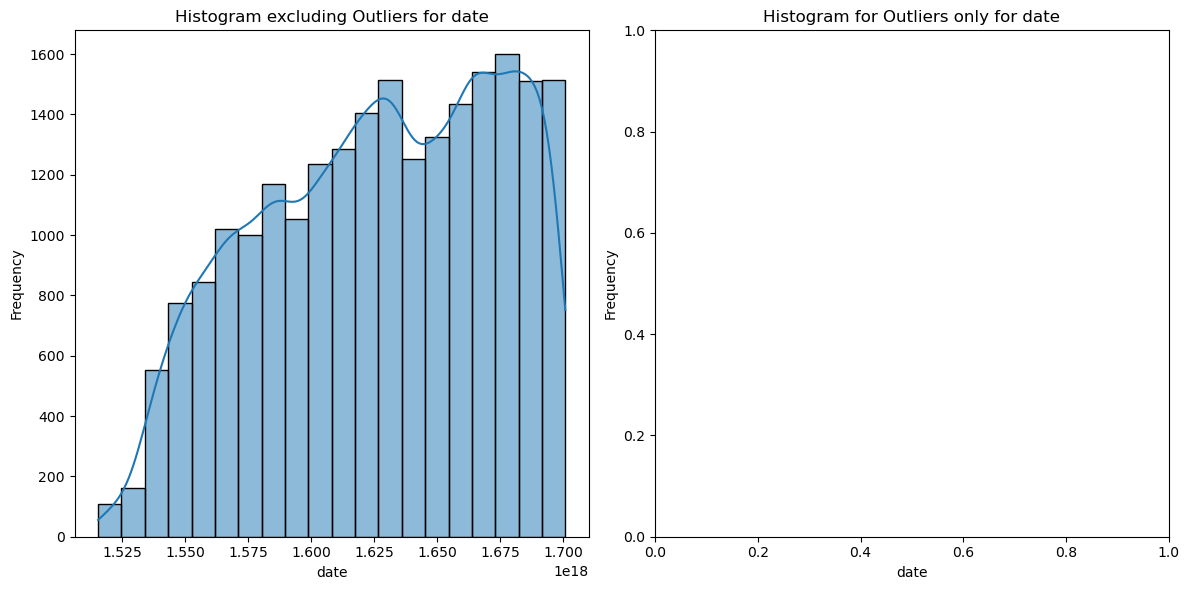

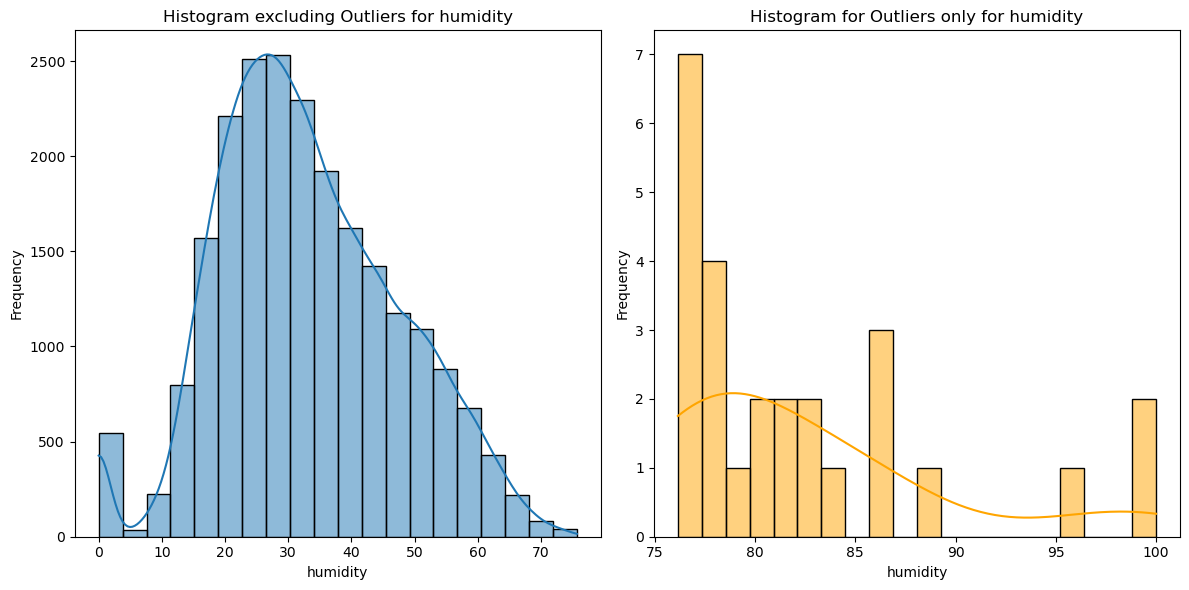

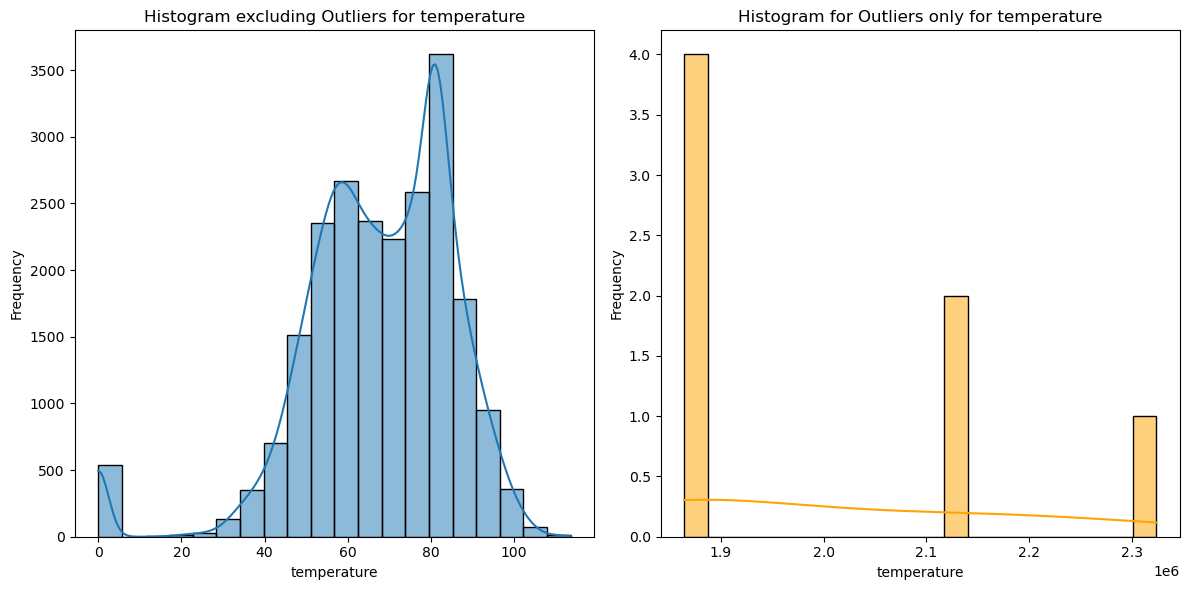

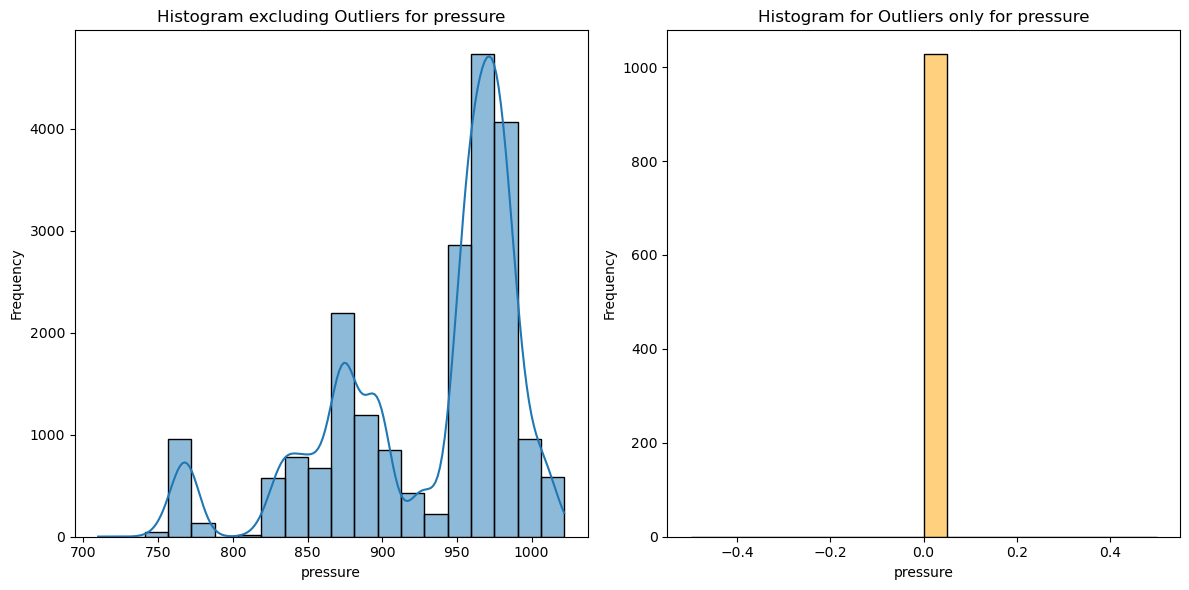

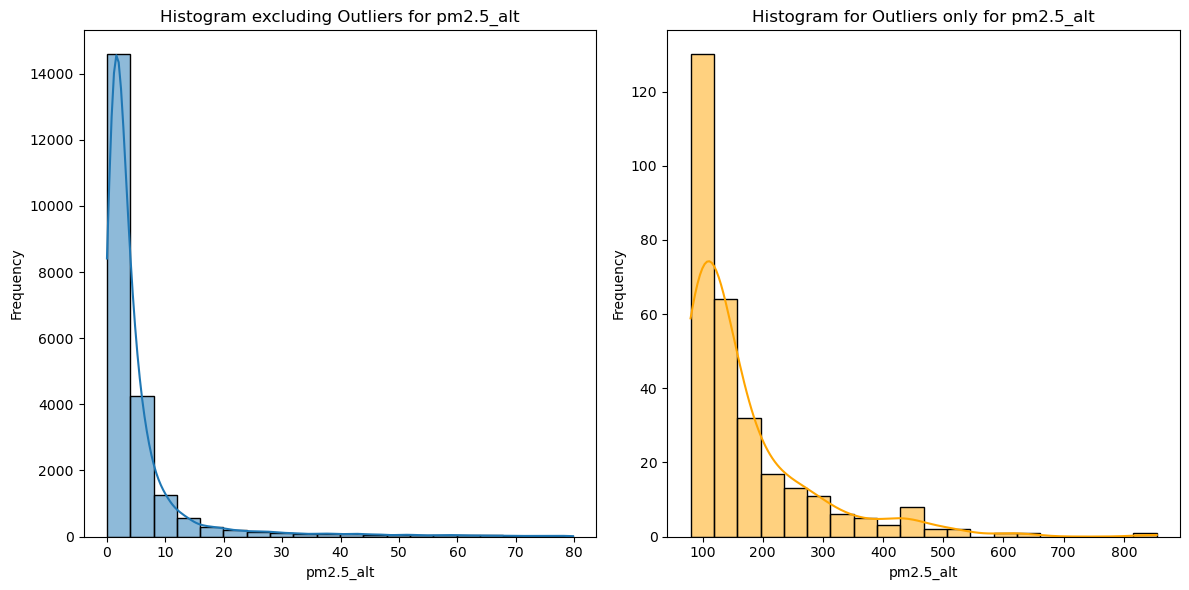

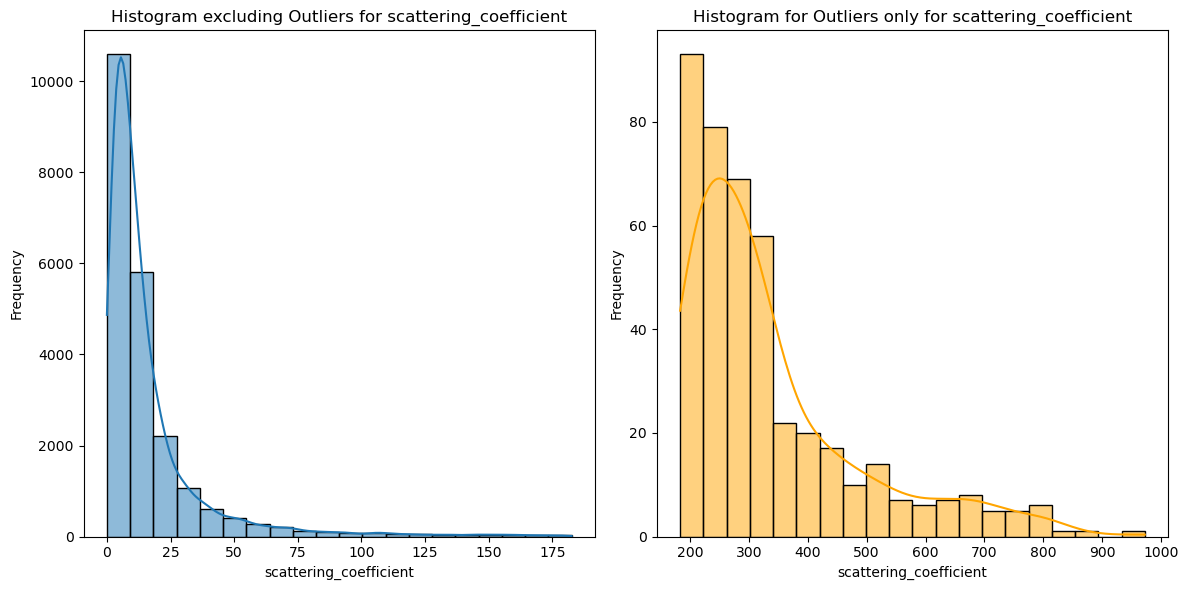

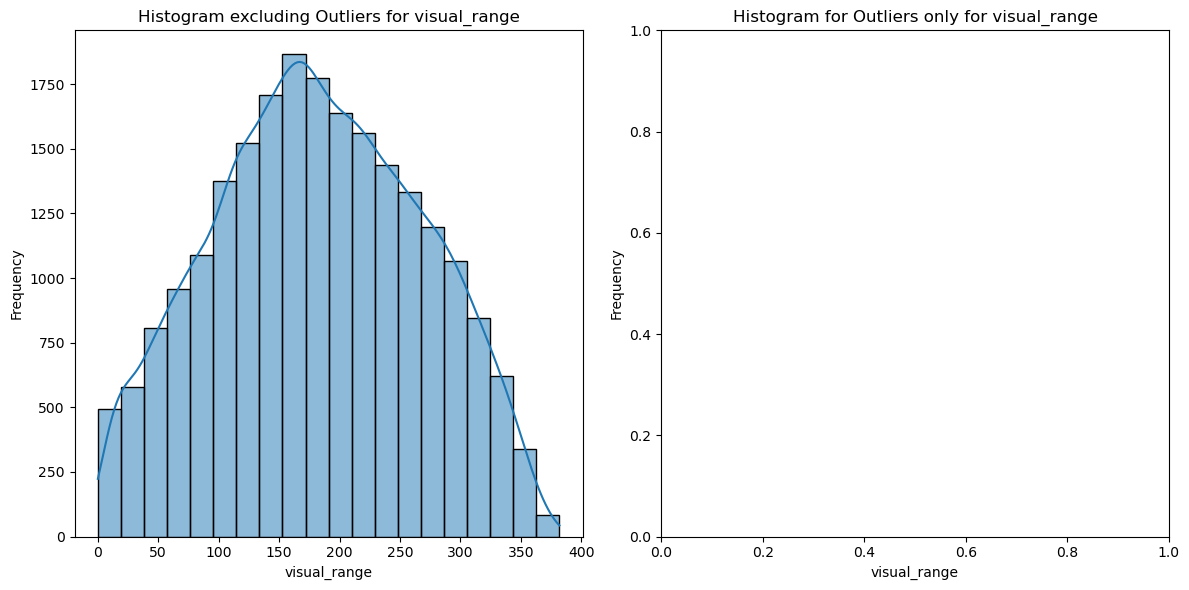

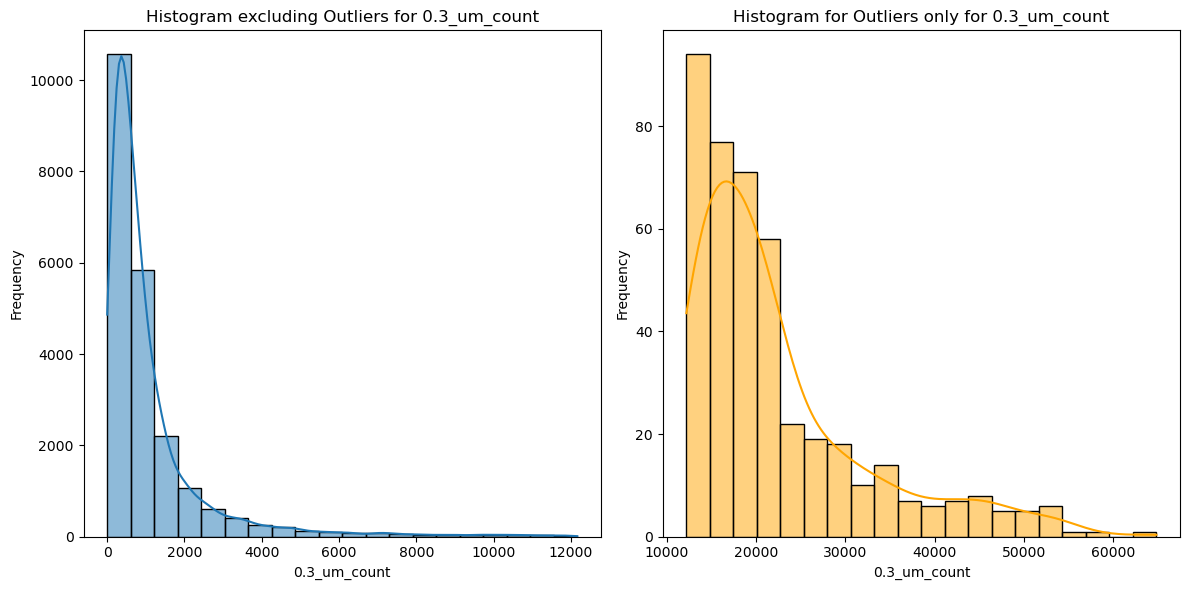

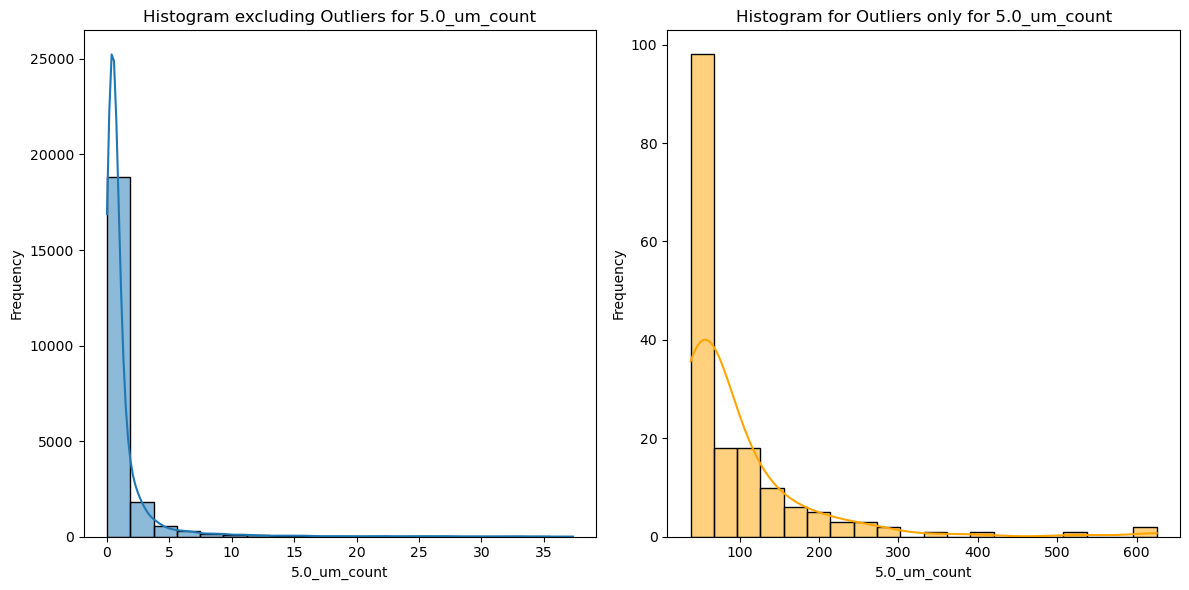

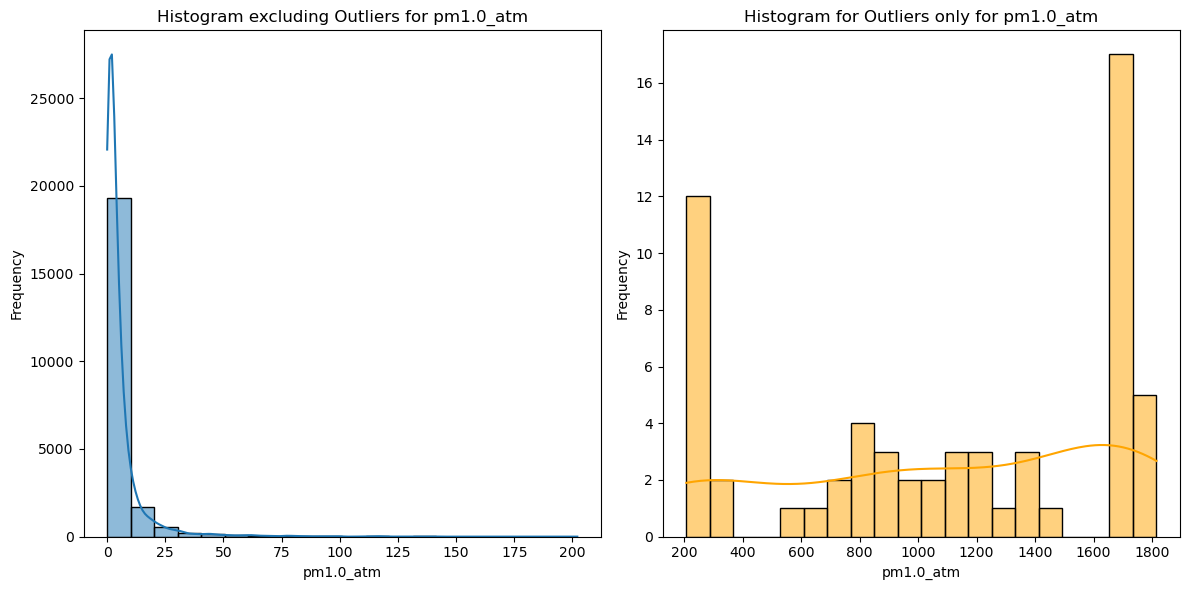

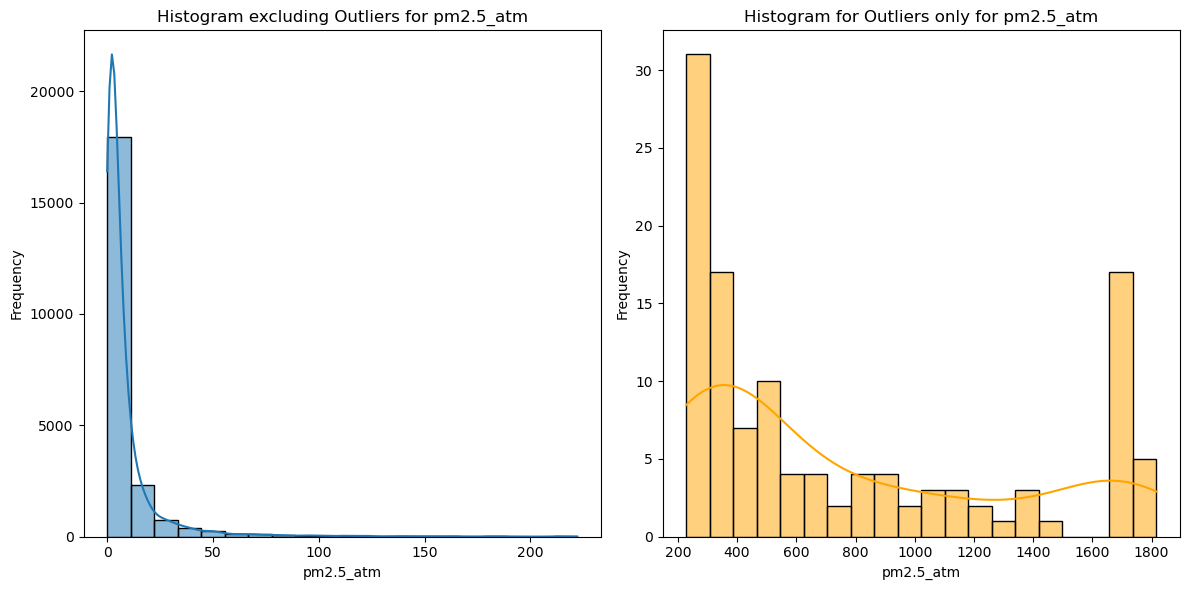

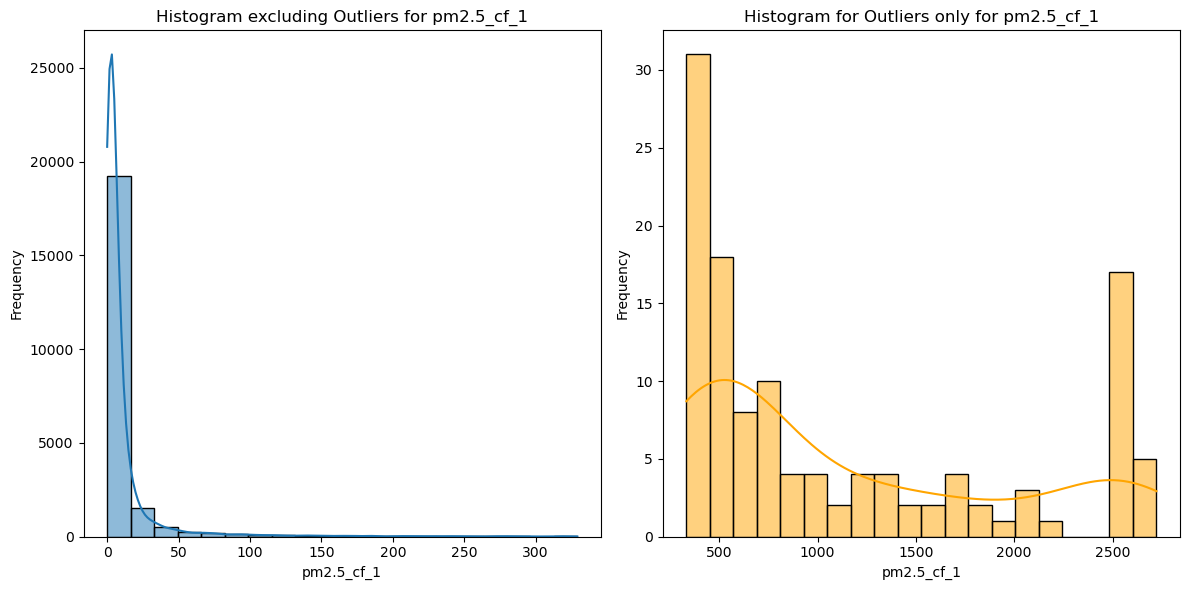

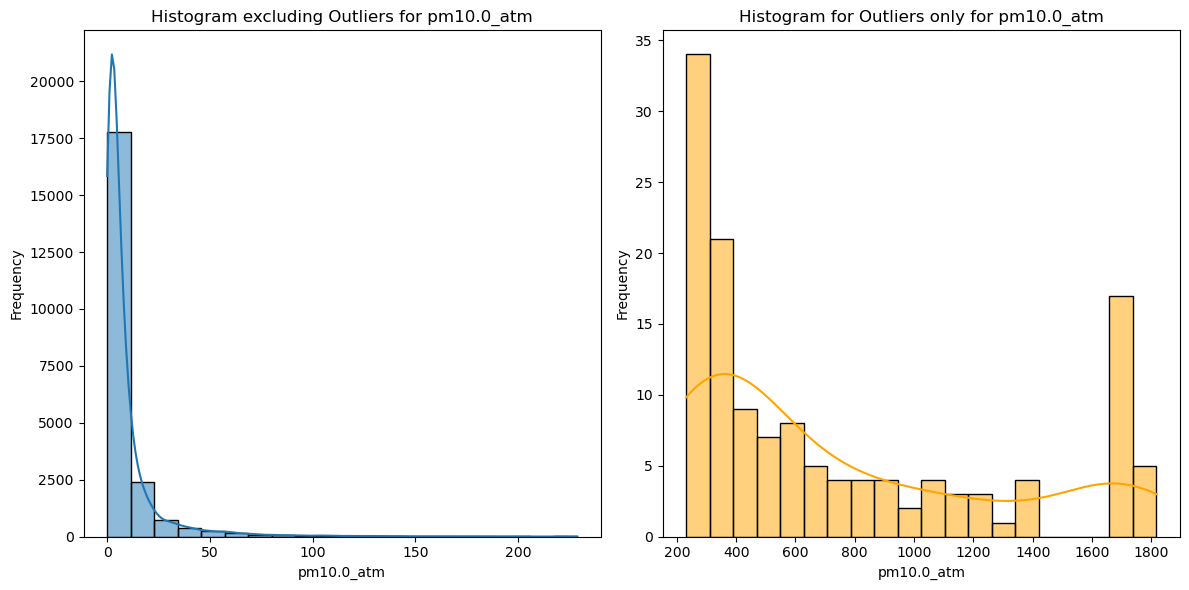

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings

# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define a function to create subplots for each column, showing histograms with and without outliers
def plot_combined_histograms(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Identify non-outliers and outliers
    non_outliers = numeric_column[z_scores <= 3]
    outliers = numeric_column[z_scores > 3]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram excluding outliers (left subplot)
    sns.histplot(non_outliers, bins=20, kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram excluding Outliers for {column.name}')
    axs[0].set_xlabel(column.name)
    axs[0].set_ylabel('Frequency')

    # Plot histogram for outliers only (right subplot)
    sns.histplot(outliers, bins=20, kde=True, ax=axs[1], color='orange')
    axs[1].set_title(f'Histogram for Outliers only for {column.name}')
    axs[1].set_xlabel(column.name)
    axs[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the combined visualization
    plt.show()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in sensor_df.columns if col not in exclude_columns]

# Plot combined histograms for each selected column
for col in columns_for_outliers:
    plot_combined_histograms(sensor_df[col])


### 3. Imputation?

- We need to handle the 0.000 values for pressure, humidity and temperature
- Air Quality Measure seem ok, don't exclude since they are the wildfire situation
- Extremely High Temp = Wildfire or error?

In [56]:
export_path = "/Users/jakobkuemmerle/Documents/CDL"

# Export the DataFrame to a CSV file
sensor_df.to_csv(f"{export_path}/Sensor_Data_Cleaned.csv", index=False)

# Weather Data

In [26]:
import os
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path_weather) if file.endswith(".csv")]

# Loop through each CSV file and append its data to the list of DataFrames
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path_weather, csv_file))

    # Add a new column with the file name (without .csv extension)
    df['sensor_id'] = os.path.splitext(csv_file)[0]
    df['sensor_id'] = df['sensor_id'].str.split('_').str[0]

    # Append the DataFrame to the list
    dfs.append(df)


In [30]:
# Concatenate all DataFrames in the list into a single DataFrame
weather_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
weather_df.head()

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun  \
0  2019-01-01   8.6   5.6  14.4   0.0   0.0   NaN  20.5   NaN     NaN   NaN   
1  2019-01-02   6.6  -1.6  14.4   0.0   0.0   NaN   3.2   NaN  1023.8   NaN   
2  2019-01-03   4.4  -1.0  12.2   0.0   0.0   NaN   1.8   NaN  1023.4   NaN   
3  2019-01-04   5.1   0.0  13.9   0.0   0.0   NaN   2.9   NaN  1015.6   NaN   
4  2019-01-05   4.2   0.0   8.9  28.2   0.0   NaN  10.4   NaN     NaN   NaN   

  sensor_id  
0     19989  
1     19989  
2     19989  
3     19989  
4     19989

In [32]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [33]:
weather_df.isna().sum()

date             0
tavg           329
tmin           329
tmax           329
prcp          2043
snow         12688
wdir          4338
wspd           672
wpgt         14392
pres          1504
tsun         14392
sensor_id        0
dtype: int64

In [34]:
weather_df.shape

(14392, 12)

In [36]:
# Extract unique values from the 'sensor_id' column
unique_sensor_ids = sensor_df['sensor_id'].unique().tolist()

# Load Sensor Base Info

In [37]:
import requests
import pandas as pd

def get_sensor_data(api_key, list_of_sensors, endpoint="https://api.purpleair.com/v1/sensors/", params=None):
    sensor_data_list = []

    headers = {
        "X-API-Key": api_key,
    }

    if params is None:
        params = {
            "fields": "name, model, hardware, location_type, private, latitude, longitude, altitude, position_rating, uptime, pa_latency, memory, last_seen, last_modified, date_created",
        }

    for sensor_id in list_of_sensors:
        try:
            response = requests.get(f"{endpoint}{sensor_id}", headers=headers, params=params)

            if response.status_code == 200:
                sensor_info = response.json().get('sensor')
                sensor_data_list.append(sensor_info)

            else:
                print(f"Error for sensor {sensor_id}: {response.status_code} - {response.text}")

        except Exception as e:
            print(f"An error occurred for sensor {sensor_id}: {e}")

    # Create a DataFrame from the list of sensor data
    sensor_base_df = pd.DataFrame(sensor_data_list)

    # Convert date-related columns to datetime
    date_columns = ['last_modified', 'date_created', 'last_seen']
    sensor_base_df[date_columns] = sensor_base_df[date_columns].apply(pd.to_datetime, unit='s')

    return sensor_base_df


In [38]:
# Example usage
api_key = "E911C960-894A-11EE-8616-42010A80000B"
list_of_sensors = unique_sensor_ids  # Assuming you have unique_sensor_ids defined
sensor_base_df = get_sensor_data(api_key, list_of_sensors)

# Display the resulting DataFrame
sensor_base_df.head()

sensor_index       last_modified        date_created           last_seen  \
0         66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
1         34275 2019-11-19 20:29:32 2019-07-04 17:10:39 2022-10-13 19:17:12   
2         12869 2018-07-16 17:51:00 2018-07-11 18:43:22 2020-08-20 06:25:16   
3         47673 2020-10-05 17:07:02 2020-01-30 17:03:44 2023-11-28 02:15:00   
4         12302 2021-08-12 18:51:37 2018-06-28 20:03:39 2023-11-28 02:15:41   

   private                              name  location_type     model  \
0        0                       Angwin home              1      PA-I   
1        0  St. Helena Boys &amp; Girls Club              0     PA-II   
2        0                      Empire Grade              0     PA-II   
3        0                        Loyalton-1              0  PA-II-SD   
4        0        CARB_SMOKE_LCAPCD_RICHMOND              0     PA-II   

                                            hardware  uptime  pa_latency  \
0                               2.0+BME280+PMSX003-A   30158       261.0   
1                     2.0+BME280+PMSX003-B+PMSX003-A   40845       295.0   
2                     2.0+BME280+PMSX003-B+PMSX003-A    1183       229.0   
3  2.0+OPENLOG+15802 MB+DS3231+BME280+PMSX003-B+P...   31961       234.0   
4                     2.0+BME280+PMSX003-B+PMSX003-A   31862       428.0   

   memory  position_rating   latitude  longitude  altitude  
0   16168                5  38.576473 -122.45517      1721  
1   14808                5  38.502920 -122.47085       258  
2   19584                5  37.100470 -122.14131      2608  
3   16320                5  39.674890 -120.24149      4954  
4   15928                5  40.371674 -120.63871      4239

In [46]:
# Convert 'sensor_index' to object type
sensor_base_df['sensor_index'] = sensor_base_df['sensor_index'].astype(str)

# Rename columns
sensor_base_df = sensor_base_df.rename(columns={
    'sensor_index': 'sensor_id',
    'date_created': 'sensor_date_created',
    'last_seen': 'sensor_last_seen',
    'latitude': 'sensor_latitude',
    'longitude': 'sensor_longitude'
})

In [400]:
sensor_base_df.to_csv('/Users/jakobkuemmerle/Documents/CDL/Tableau/base-sensor-data.csv', index=False)

In [404]:
import pandas as pd

# Specify the file path
file_path = "/Users/jakobkuemmerle/Documents/CDL/Tableau/base-sensor-data.csv"

# Specify the data types for each column
sensor_data_types = {
    'sensor_id': 'object',
    'last_modified': 'object',
    'sensor_date_created': 'object',
    'sensor_last_seen': 'object',
    'private': 'int64',
    'name': 'object',
    'location_type': 'int64',
    'model': 'object',
    'hardware': 'object',
    'uptime': 'int64',
    'pa_latency': 'float64',
    'memory': 'int64',
    'position_rating': 'int64',
    'sensor_latitude': 'float64',
    'sensor_longitude': 'float64',
    'altitude': 'int64'
}

# Read the CSV file into a Pandas DataFrame with specified data types
sensor_base_df = pd.read_csv(file_path, dtype=sensor_data_types, parse_dates=['last_modified', 'sensor_date_created', 'sensor_last_seen'])

# Display the DataFrame and its data types
print(sensor_base_df.dtypes)


sensor_id                      object
last_modified          datetime64[ns]
sensor_date_created    datetime64[ns]
sensor_last_seen       datetime64[ns]
private                         int64
name                           object
location_type                   int64
model                          object
hardware                       object
uptime                          int64
pa_latency                    float64
memory                          int64
position_rating                 int64
sensor_latitude               float64
sensor_longitude              float64
altitude                        int64
dtype: object


# Load Wildfire Data

In [76]:
import pandas as pd
import numpy as np
from io import StringIO

# Function to process wildfire data
def process_wildfires(csv_file_path):
    df_wildfires = pd.read_csv(csv_file_path)
    date_columns = ['incident_date_created', 'incident_date_last_update', 'incident_date_extinguished']
    df_wildfires[date_columns] = df_wildfires[date_columns].apply(pd.to_datetime)

    mask = df_wildfires['incident_name'].duplicated(keep=False)
    counter = {}

    def generate_new_name(name):
        if name not in counter:
            counter[name] = 1
            return name
        else:
            counter[name] += 1
            return f'{name}_{counter[name] - 1}'

    df_wildfires['incident_name'] = df_wildfires.apply(lambda row: generate_new_name(row['incident_name']) if mask[row.name] else row['incident_name'], axis=1)

    df_filtered = df_wildfires[df_wildfires['incident_date_created'] > '2019-01-01']
    
    # Define the conditions and corresponding values
    conditions = [
    (df_filtered['incident_acres_burned'] < 100),
    (df_filtered['incident_acres_burned'] < 1000),
    (df_filtered['incident_acres_burned'] < 10000),
    (df_filtered['incident_acres_burned'] < 100000),
    (df_filtered['incident_acres_burned'] < 1000000),
    (df_filtered['incident_acres_burned'] > 1000000),
    ]
    values = [1, 2, 3, 4, 5, 6]

    # Use np.select to create the 'size' column based on conditions
    df_filtered['size'] = np.select(conditions, values, default=0)
    
    df_filtered = df_filtered.drop(['incident_containment', 'incident_administrative_unit_url', 'incident_administrative_unit'], axis=1)
    df_filtered = df_filtered.drop(['incident_is_final', 'notification_desired', 'incident_url'], axis=1)
    df_filtered = df_filtered.drop(['incident_dateonly_extinguished', 'incident_dateonly_created', 'is_active'], axis=1)
    df_filtered = df_filtered.drop(['calfire_incident', 'incident_longitude_rounded','incident_latitude_rounded'], axis=1)
    df_filtered = df_filtered.drop(['incident_location', 'incident_control','incident_cooperating_agencies','incident_type'], axis=1)
    
    return df_filtered

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

In [77]:
csv_file_path = "/Users/jakobkuemmerle/Documents/CDL/Cali_Wildfire_incidents_Data.csv"
wildfire_df = process_wildfires(csv_file_path)
wildfire_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/1060261992.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['size'] = np.select(conditions, values, default=0)


incident_name incident_date_last_update     incident_date_created  \
1198  Pilot Fire_1 2019-01-15 10:38:00+00:00 2019-01-01 14:14:00+00:00   
1207  Scott Fire_1 2019-06-27 08:24:51+00:00 2019-06-25 13:51:09+00:00   
1208   York Fire_1 2019-06-24 11:45:00+00:00 2019-04-28 22:20:00+00:00   
1209     Cana Fire 2019-05-08 08:47:00+00:00 2019-04-30 12:20:00+00:00   
1210    Woody Fire 2019-05-08 08:47:00+00:00 2019-04-30 18:37:00+00:00   

     incident_county  incident_acres_burned  incident_longitude  \
1198        Humboldt                   30.0         -123.675556   
1207            Yuba                   80.0         -121.323990   
1208           Kings                  161.0         -120.097150   
1209           Butte                   10.0         -121.957000   
1210            Kern                  115.0         -118.925450   

      incident_latitude                           incident_id  \
1198          40.618056  6004d3e5-66f8-487a-80a4-689d3852378c   
1207          39.246780  31cbc968-6d9d-412b-8bc3-6846ca398fe2   
1208          35.817780  85bdd89a-4ce5-4539-a274-23fa2b030e7d   
1209          39.839580  34abbc65-5bbe-474b-85c8-16d07bb5b503   
1210          35.651890  d3beabf6-63e9-4cad-a17c-58bb36abd7ac   

     incident_date_extinguished  size  
1198  2019-01-15 10:38:00+00:00     1  
1207  2019-06-25 13:50:00+00:00     1  
1208  2019-06-24 11:45:00+00:00     2  
1209  2019-05-08 08:47:00+00:00     1  
1210  2019-05-08 08:47:00+00:00     2

In [330]:
import pandas as pd
import numpy as np

def calculate_relative_direction(sensor_wildfire):
    # Function to calculate relative direction
    def get_relative_direction(incident_lat, incident_lon, sensor_lat, sensor_lon):
        if incident_lat > sensor_lat:
            lat_direction = "north"
        elif incident_lat < sensor_lat:
            lat_direction = "south"
        else:
            lat_direction = ""

        if incident_lon > sensor_lon:
            lon_direction = "east"
        elif incident_lon < sensor_lon:
            lon_direction = "west"
        else:
            lon_direction = ""

        # Combine directions
        if lat_direction and lon_direction:
            return f"{lat_direction}-{lon_direction}"
        elif lat_direction:
            return lat_direction
        elif lon_direction:
            return lon_direction
        else:
            return "same"
    
    def get_relative_direction2(incident_lat, incident_lon, sensor_lat, sensor_lon):
        # Define cardinal directions
        directions = ["north", "north-east", "east", "south-east", "south", "south-west", "west", "north-west"]

        # Calculate angle between incident and sensor locations
        angle = np.arctan2(incident_lat - sensor_lat, incident_lon - sensor_lon)
        angle = np.degrees(angle)

        # Convert angle to direction
        direction_index = round((angle % 360) / (360. / len(directions)))
        relative_direction = directions[int(direction_index) % len(directions)]

        return relative_direction


    # Apply the function to create the 'rel_direction' column
    sensor_wildfire['rel_direction'] = sensor_wildfire.apply(
        lambda row: get_relative_direction(
            row['incident_latitude'], row['incident_longitude'],
            row['sensor_latitude'], row['sensor_longitude']
        ),
        axis=1
    )

    return sensor_wildfire

In [323]:
def find_best_candidates(base_sensors, wildfires, min_distance):
    # Create a cartesian product of the two DataFrames
    cartesian_df = pd.merge(base_sensors.assign(key=1), wildfires.assign(key=1), on='key').drop('key', axis=1)

    # Adjust column names in the haversine function
    cartesian_df['distance'] = haversine(cartesian_df['sensor_latitude'], cartesian_df['sensor_longitude'],
                                         cartesian_df['incident_latitude'], cartesian_df['incident_longitude'])
    
    result_df = cartesian_df[cartesian_df['distance'] < min_distance * np.square(cartesian_df['size'])]
    #result_df = cartesian_df[cartesian_df['distance'] < min_distance * cartesian_df['size']]
    
    # Calculate relative direction
    result_df = calculate_relative_direction(result_df)

    result_df['sensor_date_created'] = pd.to_datetime(result_df['sensor_date_created'])
    result_df['sensor_last_seen'] = pd.to_datetime(result_df['sensor_last_seen'])
    result_df['incident_date_created'] = pd.to_datetime(result_df['incident_date_created'])
    result_df['incident_date_extinguished'] = pd.to_datetime(result_df['incident_date_extinguished'])

    result_df['incident_date_created'] = result_df['incident_date_created'].dt.tz_localize(None)
    result_df['incident_date_extinguished'] = result_df['incident_date_extinguished'].dt.tz_localize(None)
    
    result_df = result_df[(result_df['sensor_date_created'] <= result_df['incident_date_extinguished']) & 
                          (result_df['sensor_last_seen'] >= result_df['incident_date_created'])]

    test_df = result_df.copy()
    result_df = result_df.groupby(['sensor_id']).agg({
        'incident_name': lambda x: x.tolist()
    }).reset_index()

    result_df.columns = ['sensor_id', 'matching_incidents']

    result_df['count_fires'] = result_df['matching_incidents'].apply(len)
    result_df = result_df.sort_values(by='count_fires', ascending=False)
    
    return test_df

In [354]:
min_distance = 10

sensor_wildfire = find_best_candidates(sensor_base_df, wildfire_df, min_distance)
print(sensor_wildfire.shape)
sensor_wildfire.head()

(345, 28)


/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3575025564.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_wildfire['rel_direction'] = sensor_wildfire.apply(
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/1008699693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['sensor_date_created'] = pd.to_datetime(result_df['sensor_date_created'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/1008699693.py:16: SettingWithCopyWarning: 
A va

sensor_id       last_modified sensor_date_created    sensor_last_seen  \
447     66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
453     66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
454     66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
460     66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
468     66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   

     private         name  location_type model              hardware  uptime  \
447        0  Angwin home              1  PA-I  2.0+BME280+PMSX003-A   30158   
453        0  Angwin home              1  PA-I  2.0+BME280+PMSX003-A   30158   
454        0  Angwin home              1  PA-I  2.0+BME280+PMSX003-A   30158   
460        0  Angwin home              1  PA-I  2.0+BME280+PMSX003-A   30158   
468        0  Angwin home              1  PA-I  2.0+BME280+PMSX003-A   30158   

     ...  incident_date_created  \
447  ...    2020-08-16 20:37:26   
453  ...    2020-08-16 08:00:00   
454  ...    2020-08-16 09:25:25   
460  ...    2020-08-17 08:00:00   
468  ...    2020-08-18 14:27:00   

                                       incident_county  incident_acres_burned  \
447  Mendocino, Humboldt, Trinity, Tehama, Glenn, L...              1032648.0   
453                              Santa Cruz, San Mateo                86509.0   
454  Santa Clara, San Joaquin, Contra Costa, Alamed...               396624.0   
460                   Napa, Solano, Lake, Sonoma, Yolo               363220.0   
468                                              Marin                 4929.0   

     incident_longitude  incident_latitude  \
447         -122.673000          39.776000   
453         -122.222750          37.171620   
454         -121.304350          37.439437   
460         -122.148640          38.481930   
468         -122.836701          38.018089   

                              incident_id incident_date_extinguished size  \
447  b8f267be-9911-44ee-8a73-7a0537fbd6fa        2020-11-11 10:21:44    6   
453  d19ac7c7-c899-4600-82c9-fe24dc29f3c9        2020-09-22 19:53:00    4   
454  22c6ea3c-304c-4b3b-bfba-7c9dfc63d9da        2020-10-01 10:29:00    5   
460  9645c55f-2b11-40ab-9ae7-df424d685a2d        2020-10-02 10:38:00    5   
468  60c2ba16-9296-4fb9-aba2-1331c25129c6        2020-10-02 07:21:00    3   

       distance rel_direction  
447  134.696335    north-west  
453  157.538768    south-east  
454  161.710378    south-east  
460   28.661604    south-east  
468   70.452977    south-west  

[5 rows x 28 columns]

In [355]:

selected_columns = ["sensor_id", "incident_name","incident_date_created", "incident_date_extinguished", "size", "distance", "rel_direction"]
sensor_wildfire[sensor_wildfire['sensor_id'] == '4478'][selected_columns].head(20)


sensor_id                                    incident_name  \
4923      4478                                      Sand Fire_2   
4924      4478                                         Ink Fire   
5130      4478                                     Kincade Fire   
5191      4478                                 Lakeville Fire_1   
5194      4478                                     Quail Fire_2   
5342      4478               August Complex (includes Doe Fire)   
5348      4478  CZU Lightning Complex (Including Warnella Fire)   
5349      4478                            SCU Lightning Complex   
5355      4478                            LNU Lightning Complex   
5363      4478                                    Woodward Fire   
5385      4478                                     Glass Fire_1   
5399      4478                                        Pope Fire   
5517      4478                               Beckwourth Complex   
5530      4478                                     Dixie Fire_1   
5545      4478                                   McFarland Fire   
5560      4478                                    Coyote Fire_6   
5562      4478                                      Caldor Fire   
5591      4478                                     Fremont Fire   
5633      4478                                       Old Fire_3   
5709      4478                                      Oak Fire_14   

     incident_date_created incident_date_extinguished  size    distance  \
4923   2019-06-08 14:50:00        2019-06-17 10:40:00     3   39.280335   
4924   2019-06-08 14:37:00        2019-06-17 08:46:00     1    7.272091   
5130   2019-10-23 21:27:00        2019-11-06 19:00:00     4   38.648670   
5191   2020-06-05 16:56:55        2020-06-06 18:37:00     2   39.817377   
5194   2020-06-06 16:36:26        2020-06-10 07:48:00     3   36.391959   
5342   2020-08-16 20:37:26        2020-11-11 10:21:44     6  135.461444   
5348   2020-08-16 08:00:00        2020-09-22 19:53:00     4  156.802349   
5349   2020-08-16 09:25:25        2020-10-01 10:29:00     5  160.260310   
5355   2020-08-17 08:00:00        2020-10-02 10:38:00     5   26.928757   
5363   2020-08-18 14:27:00        2020-10-02 07:21:00     3   70.788574   
5385   2020-09-27 08:48:00        2020-10-20 11:00:00     4    5.416293   
5399   2020-10-23 17:25:43        2020-10-25 19:10:00     1    5.149744   
5517   2021-07-04 09:26:06        2021-09-22 08:37:37     5  228.500366   
5530   2021-07-13 17:15:00        2021-10-25 07:45:46     5  170.331562   
5545   2021-07-30 18:44:00        2021-09-16 18:00:00     5  204.290660   
5560   2021-08-13 00:00:00        2021-08-15 21:46:50     2   30.968224   
5562   2021-08-14 18:54:00        2021-10-21 08:18:44     5  165.020096   
5591   2021-09-22 14:25:00        2021-09-23 07:09:40     2   33.602076   
5633   2022-05-31 15:35:00        2022-06-05 16:03:21     2   26.659450   
5709   2022-08-15 15:48:00        2022-08-31 16:00:00     4  139.085441   

     rel_direction  
4923    north-east  
4924    north-west  
5130    north-west  
5191    south-west  
5194    south-east  
5342    north-west  
5348    south-east  
5349    south-east  
5355    south-east  
5363    south-west  
5385    south-west  
5399    south-east  
5517    north-east  
5530    north-east  
5545    north-west  
5560    north-west  
5562    north-east  
5591    south-east  
5633    south-east  
5709    north-east

In [356]:
expanded_rows = []

# Iterate over each row in the DataFrame
for index, row in sensor_wildfire.iterrows():
    # Extract relevant information from the row
    sensor_id = row['sensor_id']
    incident_name = row['incident_name']
    date_created = row['incident_date_created']
    date_extinguished = row['incident_date_extinguished']

    # Handle bad-formatted times
    try:
        date_ranges = pd.date_range(start=date_created, end=date_extinguished, freq='D')
    except TypeError:
        date_ranges = [pd.to_datetime(date_created)]

    # Create rows for each date in the date range
    for date in date_ranges:
        expanded_rows.append({'sensor_id': sensor_id, 'incident_name': incident_name, 'incident_date': date})

# Create a new DataFrame from the list of expanded rows
df_expanded = pd.DataFrame(expanded_rows)
df_expanded.head()

sensor_id                       incident_name       incident_date
0     66849  August Complex (includes Doe Fire) 2020-08-16 20:37:26
1     66849  August Complex (includes Doe Fire) 2020-08-17 20:37:26
2     66849  August Complex (includes Doe Fire) 2020-08-18 20:37:26
3     66849  August Complex (includes Doe Fire) 2020-08-19 20:37:26
4     66849  August Complex (includes Doe Fire) 2020-08-20 20:37:26

In [357]:
# Select relevant columns from sensor_wildfire
columns_to_select = ['sensor_id', 'incident_name', 'incident_acres_burned', 'incident_longitude', 'incident_latitude', 'size', 'distance', 'rel_direction']

# Merge df_expanded and sensor_wildfire on sensor_id and incident_name
df_expanded = pd.merge(df_expanded, sensor_wildfire[columns_to_select], how='left', left_on=['incident_name', 'sensor_id'], right_on=['incident_name', 'sensor_id'])
df_expanded.shape


(12892, 9)

In [358]:

# Extract date from 'incident_date'
df_expanded['date'] = df_expanded['incident_date'].dt.date

# Define custom aggregation functions to get lists
def list_agg(series):
    return list(series)

# Group by 'sensor_id' and 'date_only' and perform aggregations
grouped_df = df_expanded.groupby(['sensor_id', 'date']).agg({
    'incident_name': 'nunique',               # Count unique incident_name
    'size': ['mean', list_agg],               # Calculate average size and get a list
    'distance': ['mean', list_agg],            # Calculate average distance and get a list
    'rel_direction': list_agg            # Calculate average distance and get a list
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['sensor_id', 'date', 'unique_incident_count', 'average_size', 'list_of_sizes', 'average_distance', 'list_of_distances', 'list_of_rel_direction']


In [359]:
grouped_df.sort_values('unique_incident_count', ascending = False).head()

sensor_id        date  unique_incident_count  average_size  \
2287     19989  2021-08-25                      9      4.333333   
4950      8136  2021-08-24                      8      4.750000   
4946      8136  2021-08-20                      8      4.750000   
2284     19989  2021-08-22                      8      4.750000   
2285     19989  2021-08-23                      8      4.750000   

                    list_of_sizes  average_distance  \
2287  [4, 5, 5, 5, 5, 5, 5, 4, 1]         99.330327   
4950     [4, 5, 5, 5, 5, 5, 5, 4]        114.832710   
4946     [4, 5, 5, 5, 5, 5, 5, 4]        114.832710   
2284     [4, 5, 5, 5, 5, 5, 5, 4]        111.476653   
2285     [4, 5, 5, 5, 5, 5, 5, 4]        111.476653   

                                      list_of_distances  \
2287  [95.40215435289892, 201.8960285388892, 124.392...   
4950  [107.7304612411757, 201.2144033902536, 120.426...   
4946  [107.7304612411757, 201.2144033902536, 120.426...   
2284  [95.40215435289892, 201.8960285388892, 124.392...   
2285  [95.40215435289892, 201.8960285388892, 124.392...   

                                  list_of_rel_direction  
2287  [north-east, south-east, south-east, south-wes...  
4950  [north-east, south-east, south-east, south-wes...  
4946  [north-east, south-east, south-east, south-wes...  
2284  [north-east, south-east, south-east, south-wes...  
2285  [north-east, south-east, south-east, south-wes...

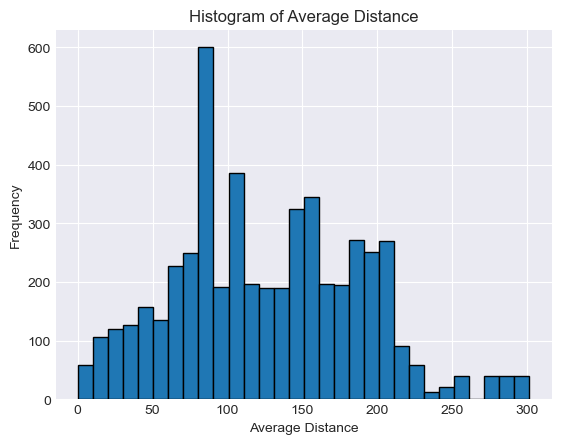

In [360]:
# Plot a histogram of 'average_distance'
plt.hist(grouped_df['average_distance'], bins=30, edgecolor='black')
plt.title('Histogram of Average Distance')
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.show()

# Join Sensor Info, Sensor Data and Weather Data

In [361]:
# Perform a left join on 'sensor_index'
sensor_final_df = pd.merge(sensor_df, sensor_base_df, how='left', left_on='sensor_id', right_on='sensor_id')
# Perform a left join on 'date' and 'sensor_id' in weather_df and 'time_stamp' and 'sensor_id' in sensor_final_df
sensor_final_df = pd.merge(sensor_final_df, weather_df, how='left', left_on=['date', 'sensor_id'], right_on=['date', 'sensor_id'])

sensor_final_df.shape


(22304, 39)

# Join Sensor Data and Wildfire Data


In [362]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])
final_df = pd.merge(sensor_final_df, grouped_df, how='left', left_on=['date', 'sensor_id'], right_on=['date', 'sensor_id'])
final_df.shape

(22304, 45)

In [363]:
final_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
0 2020-10-11    35.819       80.364   957.176        1.4   
1 2020-11-28    23.821       80.692   961.921        1.2   
2 2020-10-17    17.943       89.671   954.660        0.5   
3 2020-09-24    30.565       85.556   956.637        1.2   
4 2020-12-06    26.742       83.439   963.470        4.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.5         254.1       296.972         0.321   
1                     4.2         260.0       277.775         0.216   
2                     1.6         328.2       104.678         0.267   
3                     4.2         258.7       281.900         0.241   
4                    14.7         141.2       979.037         0.951   

   pm1.0_atm  ...  wspd  wpgt  pres tsun unique_incident_count average_size  \
0      0.982  ...   NaN   NaN   NaN  NaN                   2.0         5.00   
1      0.737  ...   NaN   NaN   NaN  NaN                   NaN          NaN   
2      0.099  ...   NaN   NaN   NaN  NaN                   2.0         5.00   
3      0.877  ...   NaN   NaN   NaN  NaN                   4.0         4.75   
4      4.754  ...   NaN   NaN   NaN  NaN                   NaN          NaN   

  list_of_sizes  average_distance  \
0        [6, 4]         69.333871   
1           NaN               NaN   
2        [6, 4]         69.333871   
3  [6, 5, 5, 3]         98.880324   
4           NaN               NaN   

                                   list_of_distances  \
0            [134.6963354344659, 3.9714057770836804]   
1                                                NaN   
2            [134.6963354344659, 3.9714057770836804]   
3  [134.6963354344659, 161.71037833953693, 28.661...   
4                                                NaN   

                              list_of_rel_direction  
0                          [north-west, south-west]  
1                                               NaN  
2                          [north-west, south-west]  
3  [north-west, south-east, south-east, south-west]  
4                                               NaN  

[5 rows x 45 columns]

In [364]:
# Replace NaN values with 0 in specific columns
columns_to_fillna = ['unique_incident_count', 'average_size', 'average_distance']
final_df[columns_to_fillna] = final_df[columns_to_fillna].fillna(0)

# Create a new column 'target'
final_df['target'] = final_df['unique_incident_count'].apply(lambda x: 1 if x > 0 else 0)

final_df.isna().sum()

date                          0
humidity                      0
temperature                   0
pressure                      0
pm2.5_alt                     0
scattering_coefficient        0
visual_range                  0
0.3_um_count                  0
5.0_um_count                  0
pm1.0_atm                     0
pm2.5_atm                     0
pm2.5_cf_1                    0
pm10.0_atm                    0
sensor_id                     0
last_modified                 0
sensor_date_created           0
sensor_last_seen              0
private                       0
name                          0
location_type                 0
model                         0
hardware                      0
uptime                        0
pa_latency                 1001
memory                        0
position_rating               0
sensor_latitude               0
sensor_longitude              0
altitude                      0
tavg                      11443
tmin                      11443
tmax    

In [365]:
final_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
0 2020-10-11    35.819       80.364   957.176        1.4   
1 2020-11-28    23.821       80.692   961.921        1.2   
2 2020-10-17    17.943       89.671   954.660        0.5   
3 2020-09-24    30.565       85.556   956.637        1.2   
4 2020-12-06    26.742       83.439   963.470        4.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.5         254.1       296.972         0.321   
1                     4.2         260.0       277.775         0.216   
2                     1.6         328.2       104.678         0.267   
3                     4.2         258.7       281.900         0.241   
4                    14.7         141.2       979.037         0.951   

   pm1.0_atm  ...  wpgt  pres  tsun unique_incident_count average_size  \
0      0.982  ...   NaN   NaN   NaN                   2.0         5.00   
1      0.737  ...   NaN   NaN   NaN                   0.0         0.00   
2      0.099  ...   NaN   NaN   NaN                   2.0         5.00   
3      0.877  ...   NaN   NaN   NaN                   4.0         4.75   
4      4.754  ...   NaN   NaN   NaN                   0.0         0.00   

  list_of_sizes average_distance  \
0        [6, 4]        69.333871   
1           NaN         0.000000   
2        [6, 4]        69.333871   
3  [6, 5, 5, 3]        98.880324   
4           NaN         0.000000   

                                   list_of_distances  \
0            [134.6963354344659, 3.9714057770836804]   
1                                                NaN   
2            [134.6963354344659, 3.9714057770836804]   
3  [134.6963354344659, 161.71037833953693, 28.661...   
4                                                NaN   

                              list_of_rel_direction  target  
0                          [north-west, south-west]       1  
1                                               NaN       0  
2                          [north-west, south-west]       1  
3  [north-west, south-east, south-east, south-west]       1  
4                                               NaN       0  

[5 rows x 46 columns]

In [366]:
subset_df = final_df.dropna(subset=['tavg'])
subset_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
2303 2019-10-11    15.918       68.038   926.446        3.3   
2304 2019-08-27    10.035       90.543   923.192        0.4   
2305 2019-12-13    55.267       60.675   933.648        0.9   
2306 2019-01-23    32.291       54.944   937.922        0.6   
2307 2019-02-15    70.416       45.442   922.313        0.5   

      scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
2303                    11.4         164.5      761.3590        0.8265   
2304                     1.6         327.9      105.2000        0.0625   
2305                     3.0         286.5      200.6605        0.5825   
2306                     2.3         306.6      151.0885        0.3530   
2307                     1.7         324.8      111.5450        0.6515   

      pm1.0_atm  ...  wpgt    pres  tsun unique_incident_count average_size  \
2303     3.6135  ...   NaN  1015.2   NaN                   0.0          0.0   
2304     0.1225  ...   NaN  1010.0   NaN                   0.0          0.0   
2305     0.4445  ...   NaN     NaN   NaN                   0.0          0.0   
2306     0.4850  ...   NaN  1028.8   NaN                   0.0          0.0   
2307     0.1815  ...   NaN  1015.8   NaN                   0.0          0.0   

     list_of_sizes average_distance  list_of_distances list_of_rel_direction  \
2303           NaN              0.0                NaN                   NaN   
2304           NaN              0.0                NaN                   NaN   
2305           NaN              0.0                NaN                   NaN   
2306           NaN              0.0                NaN                   NaN   
2307           NaN              0.0                NaN                   NaN   

      target  
2303       0  
2304       0  
2305       0  
2306       0  
2307       0  

[5 rows x 46 columns]

In [367]:

# Calculate the number of unique sensor_ids
total_unique_sensor_ids = subset_df['sensor_id'].nunique()

# Group by 'sensor_id' and check if at least one row has 'target' equal to 1
sensor_with_target_1 = subset_df.groupby('sensor_id')['target'].apply(lambda x: (x > 0).any())

# Count the number of True values (sensor_id with at least one row where target is 1)
num_sensors_with_target_1 = sensor_with_target_1.sum()

# Display the results
print(f"Number of unique sensor_ids: {total_unique_sensor_ids}")
print(f"Number of sensor_ids with at least one row where target is 1: {num_sensors_with_target_1}")
print(f"Percentage of sensor_ids with at least one row where target is 1: {num_sensors_with_target_1 / total_unique_sensor_ids * 100:.2f}%")

Number of unique sensor_ids: 8
Number of sensor_ids with at least one row where target is 1: 8
Percentage of sensor_ids with at least one row where target is 1: 100.00%


In [368]:

# Calculate the number of unique sensor_ids
total_unique_sensor_ids = subset_df['sensor_id'].nunique()

# Group by 'sensor_id' and check if at least one row has 'unique_incident_count' greater than 1
sensor_with_count_greater_than_1 = subset_df.groupby('sensor_id')['unique_incident_count'].apply(lambda x: (x > 1).any())

# Count the number of True values (sensor_id with at least one row where unique_incident_count is greater than 1)
num_sensors_with_count_greater_than_1 = sensor_with_count_greater_than_1.sum()

# Display the results
print(f"Number of unique sensor_ids: {total_unique_sensor_ids}")
print(f"Number of sensor_ids with at least one row where unique_incident_count is greater than 1: {num_sensors_with_count_greater_than_1}")
print(f"Percentage of sensor_ids with at least one row where unique_incident_count is greater than 1: {num_sensors_with_count_greater_than_1 / total_unique_sensor_ids * 100:.2f}%")


Number of unique sensor_ids: 8
Number of sensor_ids with at least one row where unique_incident_count is greater than 1: 8
Percentage of sensor_ids with at least one row where unique_incident_count is greater than 1: 100.00%


# Plot Results

In [251]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor_data(df, sensor_id):
    # Filter DataFrame by sensor_id and select specific columns
    selected_columns = ['date', 'humidity', 'temperature', 'pressure', 'pm2.5_alt', 'scattering_coefficient',
                         'visual_range', '0.3_um_count', '5.0_um_count', 'pm1.0_atm', 'pm2.5_atm', 'pm2.5_cf_1',
                         'pm10.0_atm', 'wspd', 'prcp', 'snow','tmax','target']
    sensor_df = df[df['sensor_id'] == sensor_id][selected_columns].sort_values(by='date')

    # Set a nice plot style
    plt.style.use('seaborn-darkgrid')

    # Set up subplots with larger size
    fig, axes = plt.subplots(nrows=len(selected_columns) - 2, ncols=1, figsize=(12, 4 * (len(selected_columns) - 2)))

    # Define a color map for the lines
    color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)

    # Iterate over each column (excluding 'date' and 'target')
    for idx, column in enumerate(selected_columns[1:-1]):  # Exclude 'date' and 'target'
        ax = axes[idx]

        if sensor_df[column].dtype == np.dtype('datetime64[ns]'):
            # If column is datetime, plot the count of occurrences
            ax.plot(sensor_df['date'], (sensor_df[column] > 0).astype(int), label='Count', color=color_map(idx))
        else:
            # Plot average values with different colors
            ax.plot(sensor_df['date'], sensor_df[column].rolling(window=7, min_periods=1).mean(), label='Average', color=color_map(idx))

        # Highlight areas where target is 1 in gray
        target_mask = sensor_df['target'] == 1
        ax.fill_between(sensor_df['date'], 0, sensor_df[column].max(), where=target_mask, color='gray', alpha=0.2, label='Target=1')

        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    plt.tight_layout()
    plt.show()


In [252]:
unique_sensor_ids = subset_df['sensor_id'].unique()
print(unique_sensor_ids)

['12869' '4478' '8136' '18461' '4091' '19989' '18557' '84181']


/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


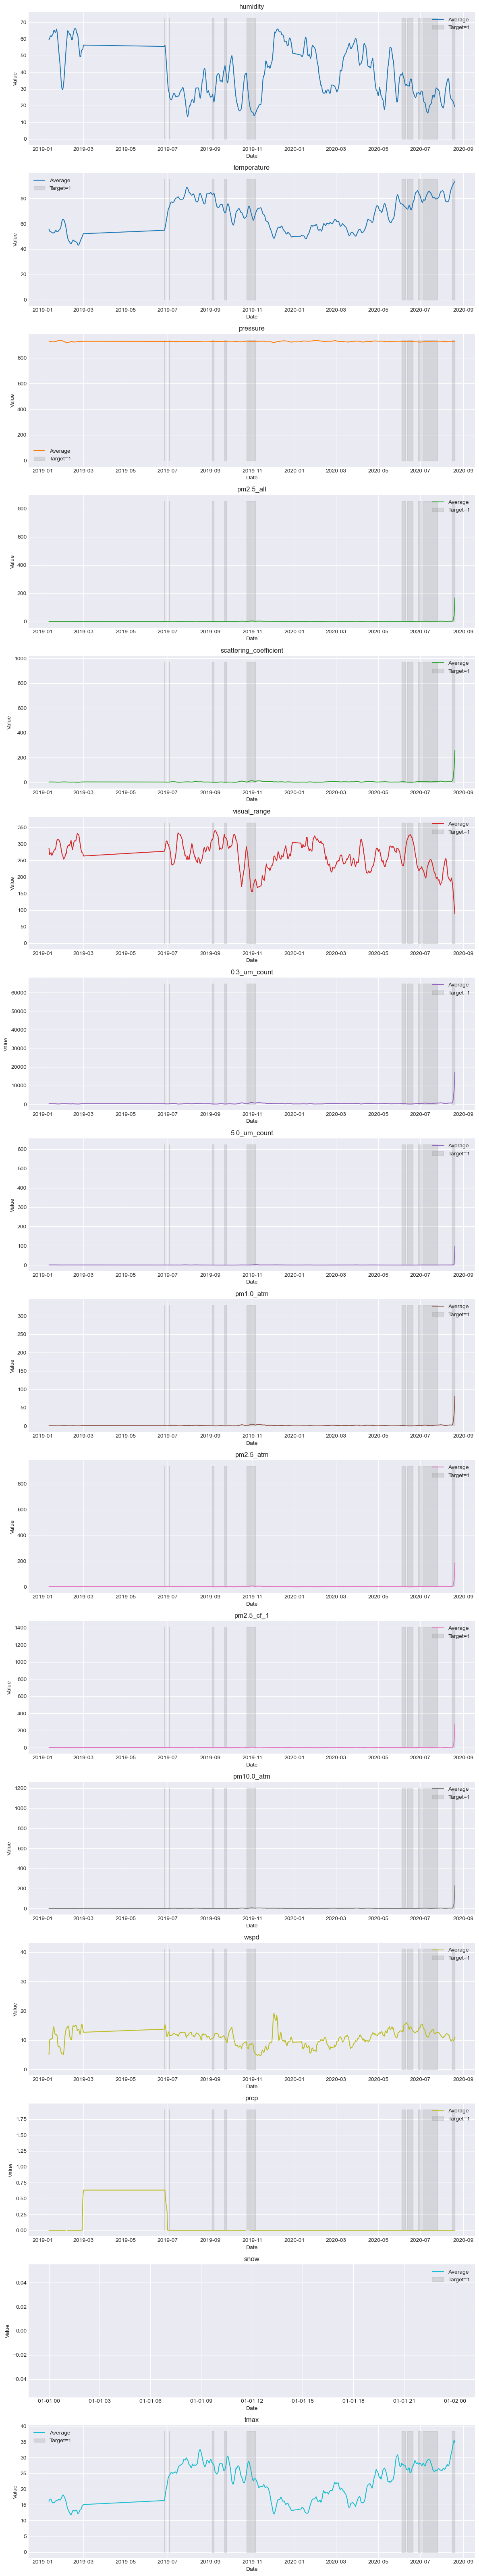

In [313]:
plot_sensor_data(subset_df, sensor_id='12869')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


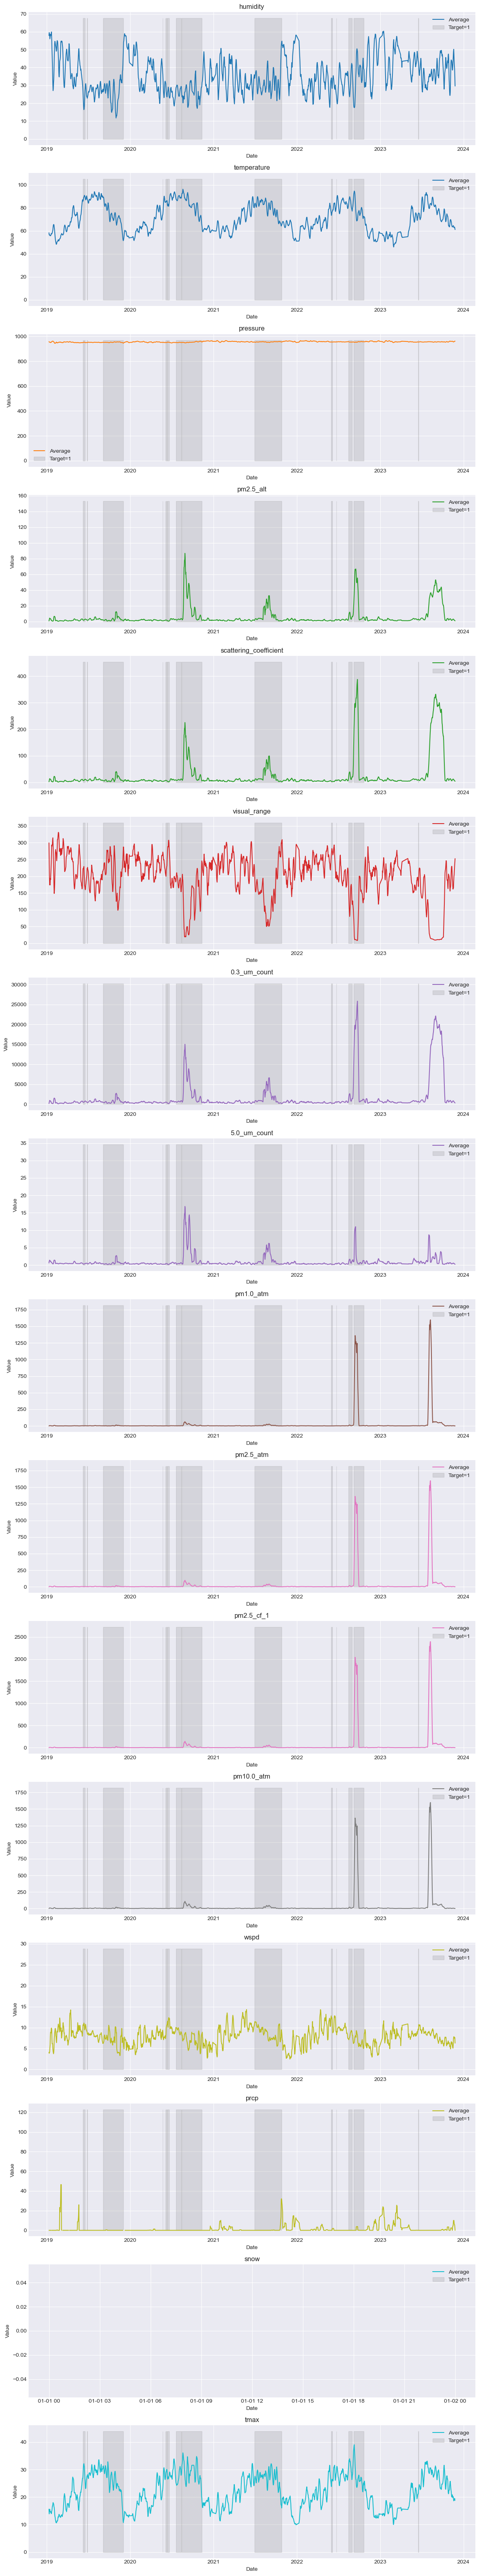

In [314]:
plot_sensor_data(subset_df, sensor_id='4478')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


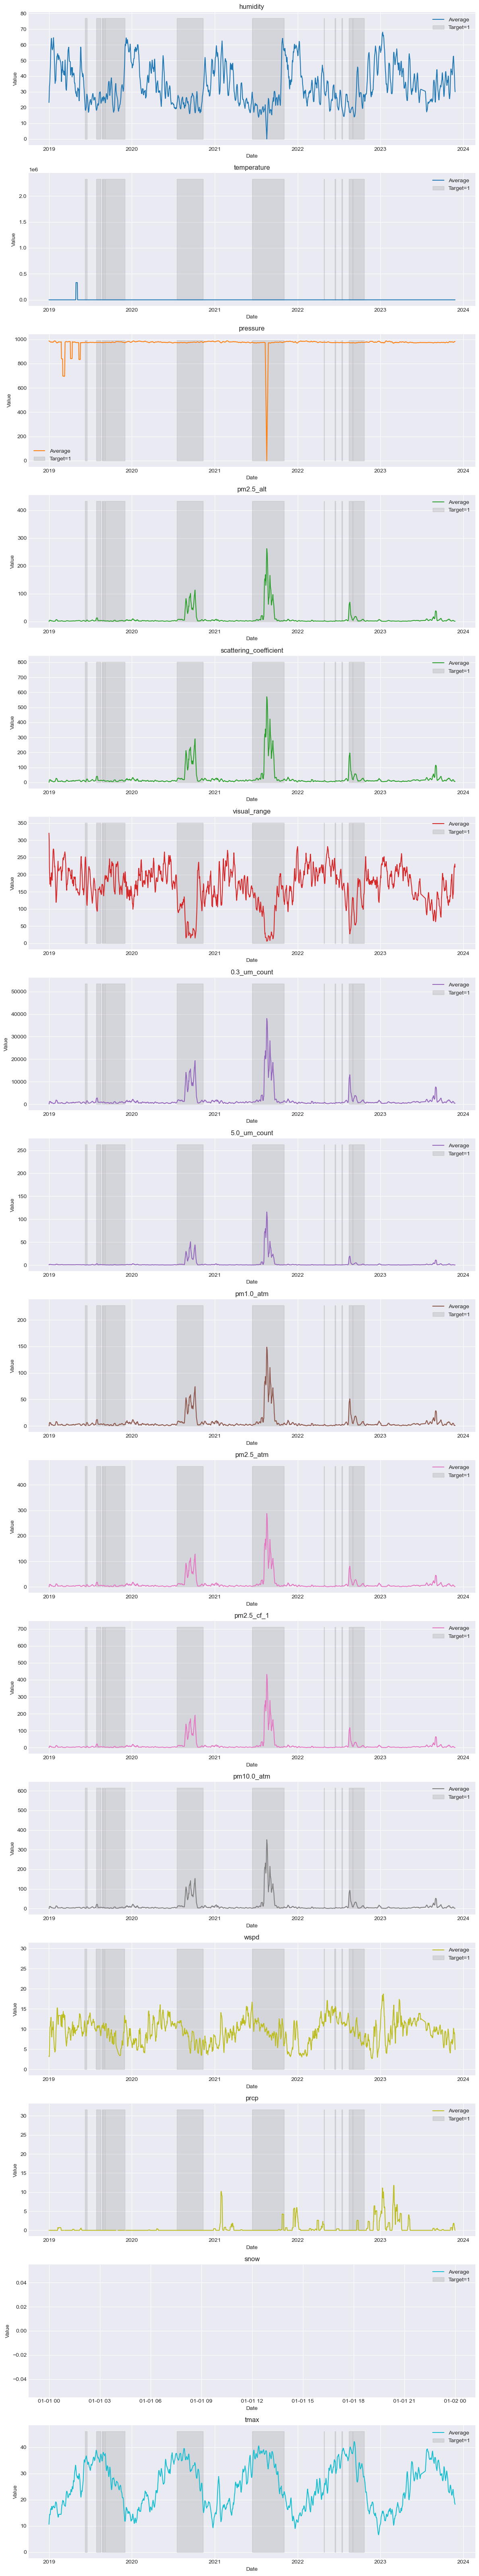

In [315]:
plot_sensor_data(subset_df, sensor_id='8136')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


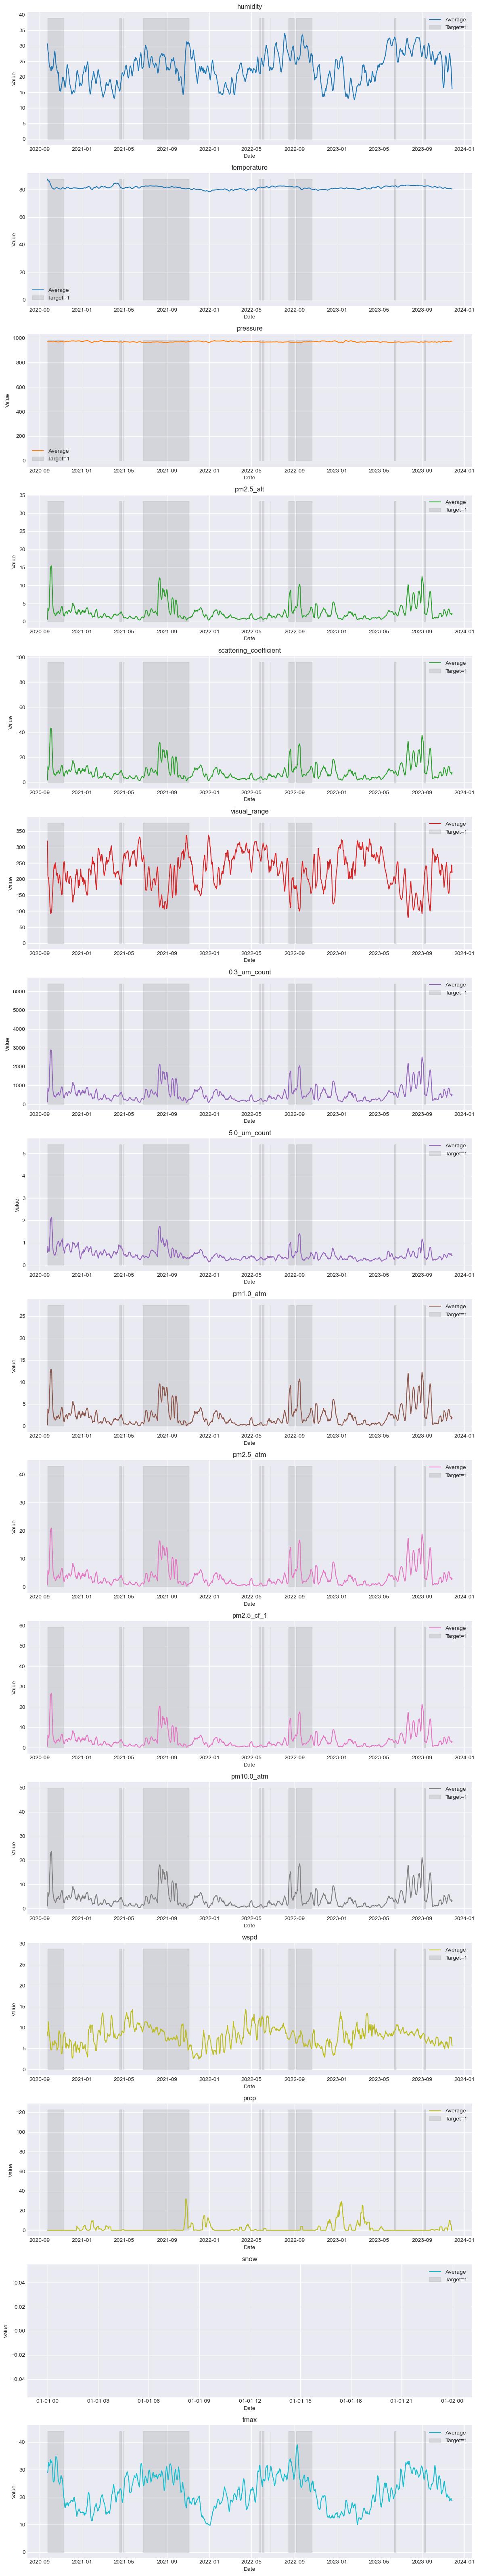

In [316]:
plot_sensor_data(subset_df, sensor_id='18461')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


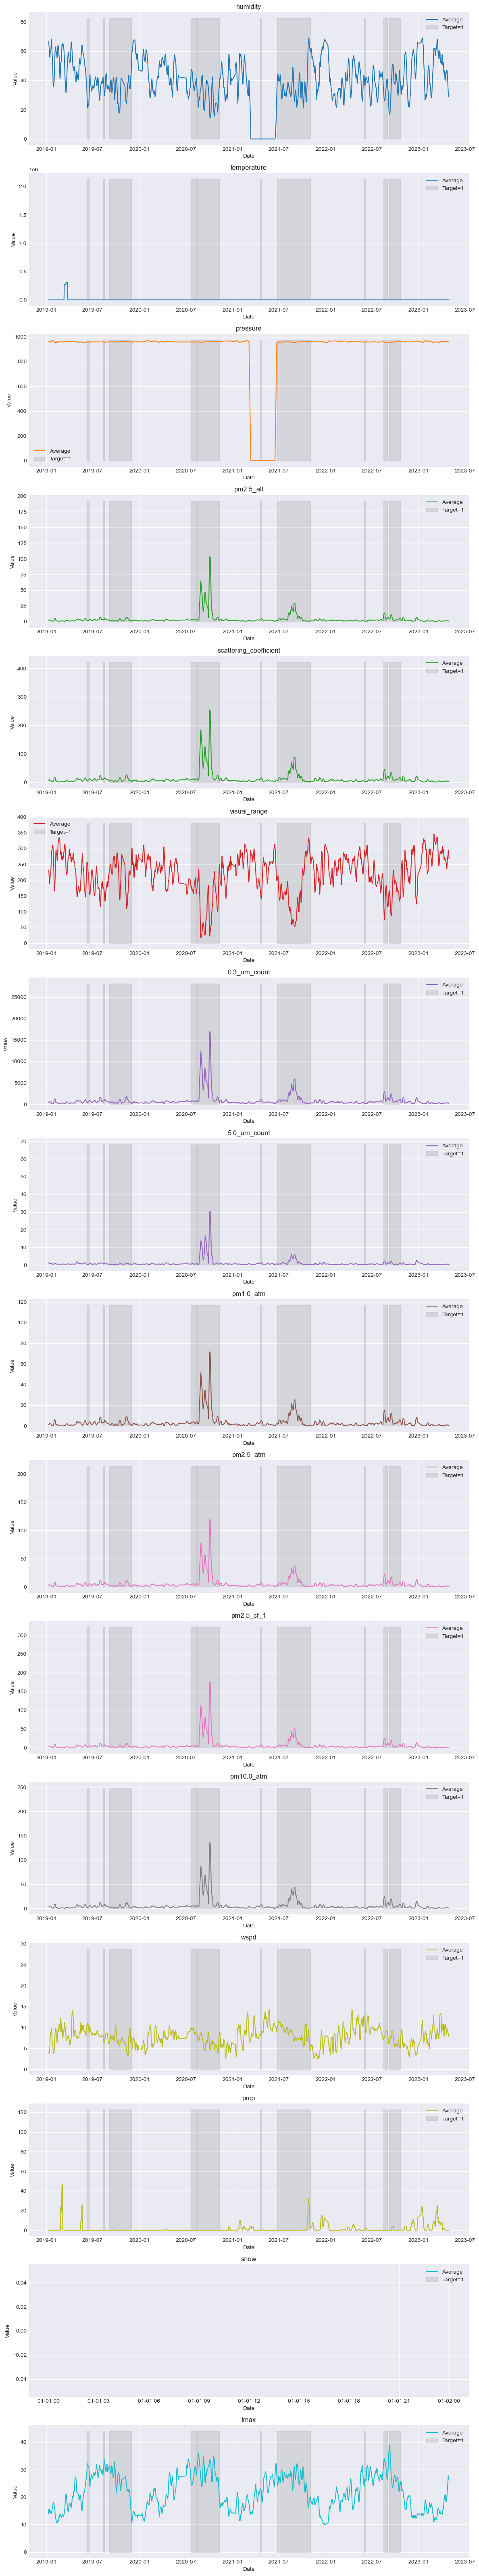

In [317]:
plot_sensor_data(subset_df, sensor_id='4091')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


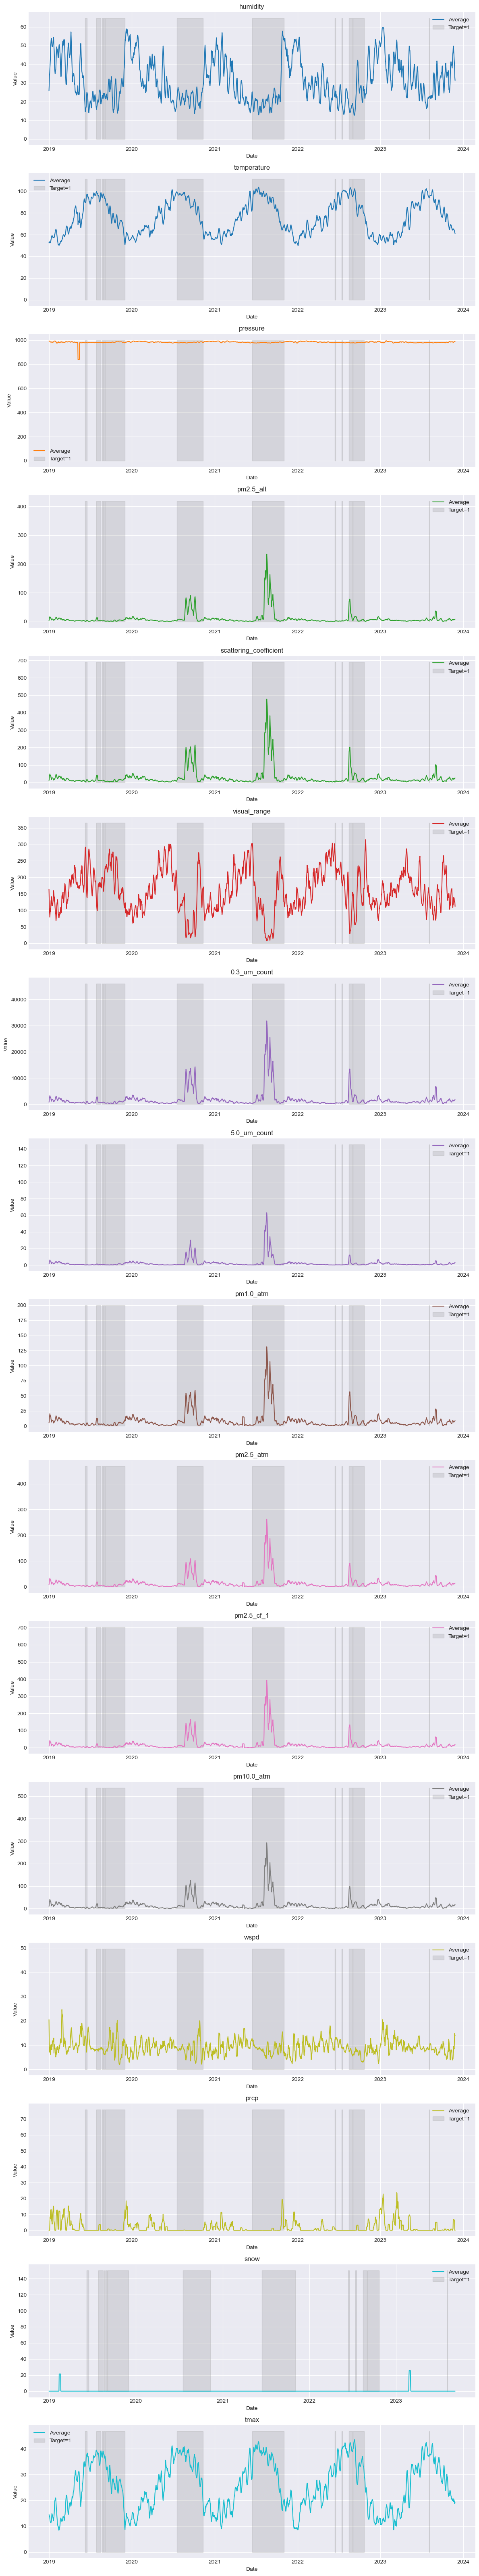

In [318]:
plot_sensor_data(subset_df, sensor_id='19989')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


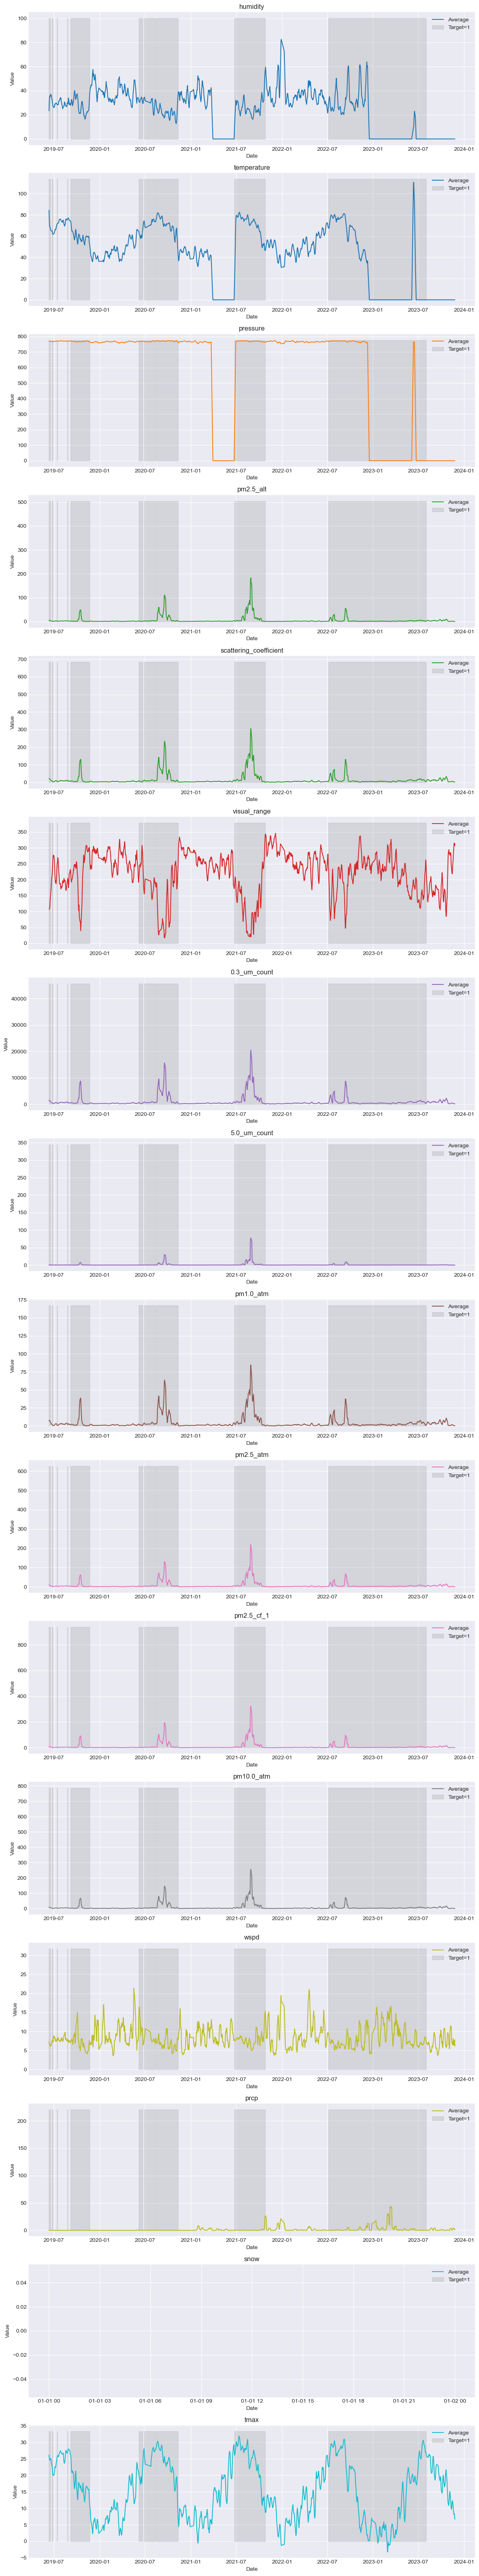

In [319]:
plot_sensor_data(subset_df, sensor_id='18557')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


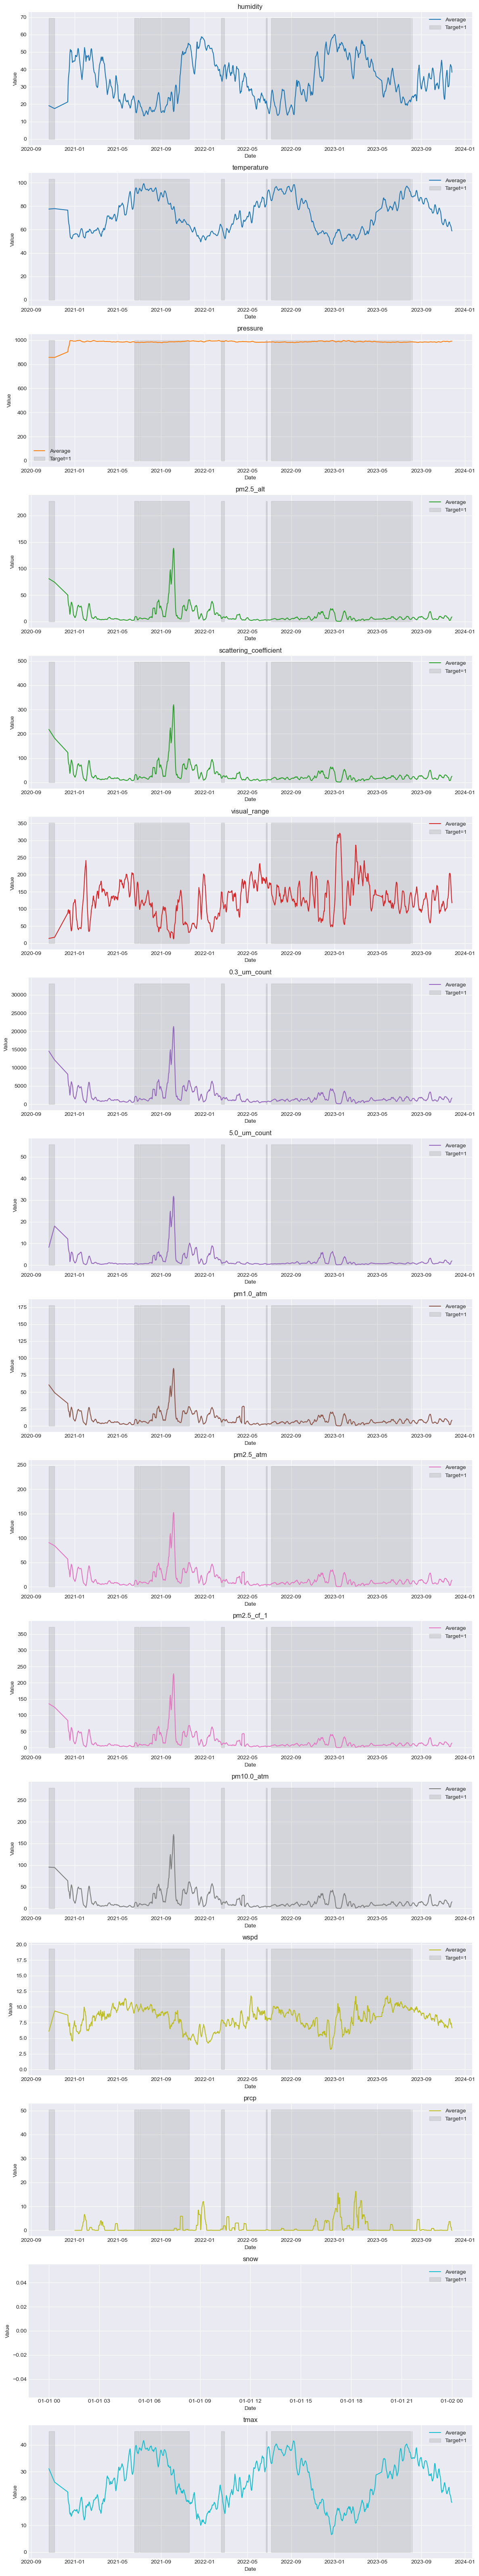

In [320]:
plot_sensor_data(subset_df, sensor_id='84181')

# Export Merged Data

In [369]:
subset_df.to_csv('/Users/jakobkuemmerle/Documents/CDL/Tableau/merged_df_10km_size_sq.csv', index=False)

# Analysis with the above Data (on Google Drive)

In [371]:
subset_df.describe()

date      humidity   temperature  \
count                          10861  10861.000000  1.086100e+04   
mean   2021-07-28 13:38:34.593499648     31.932806  6.494709e+02   
min              2019-01-01 00:00:00      0.000000  0.000000e+00   
25%              2020-06-08 00:00:00     21.428000  5.757100e+01   
50%              2021-08-18 00:00:00     29.619000  7.014700e+01   
75%              2022-09-17 00:00:00     42.277000  8.181100e+01   
max              2023-11-26 00:00:00    100.000000  2.324186e+06   
std                              NaN     15.510862  3.514190e+04   

           pressure     pm2.5_alt  scattering_coefficient  visual_range  \
count  10861.000000  10861.000000            10861.000000  10861.000000   
mean     901.393830      6.791032               21.015809    190.735908   
min        0.000000      0.100000                0.200000      3.300000   
25%      953.220000      1.100000                4.400000    131.700000   
50%      967.136000      2.300000                8.700000    190.600000   
75%      980.130000      4.600000               16.300000    255.800000   
max     1001.234000    854.600000              972.500000    381.900000   
std      213.382071     21.879145               51.328877     84.242122   

       0.3_um_count  5.0_um_count     pm1.0_atm  ...         snow  \
count  10861.000000  10861.000000  10861.000000  ...  1696.000000   
mean    1401.055002      1.598774      9.340847  ...     0.194575   
min       11.717000      0.014000      0.000000  ...     0.000000   
25%      291.479000      0.248000      0.719000  ...     0.000000   
50%      581.124500      0.453000      2.186000  ...     0.000000   
75%     1089.087000      0.893000      5.182000  ...     0.000000   
max    64832.315000    625.403500   1815.447000  ...   150.000000   
std     3421.884989      9.407984     73.183222  ...     4.968086   

              wdir          wspd wpgt          pres tsun  \
count  8152.000000  10620.000000  0.0  10037.000000  0.0   
mean    212.281281      8.592618  NaN   1015.879167  NaN   
min       0.000000      0.000000  NaN    995.600000  NaN   
25%     132.000000      5.600000  NaN   1012.100000  NaN   
50%     223.000000      7.900000  NaN   1015.200000  NaN   
75%     323.000000     10.500000  NaN   1019.500000  NaN   
max     360.000000     49.700000  NaN   1035.700000  NaN   
std     119.779810      4.438286  NaN      5.366633  NaN   

       unique_incident_count  average_size  average_distance        target  
count           10861.000000  10861.000000      10861.000000  10861.000000  
mean                0.452537      0.717101         19.169138      0.165915  
min                 0.000000      0.000000          0.000000      0.000000  
25%                 0.000000      0.000000          0.000000      0.000000  
50%                 0.000000      0.000000          0.000000      0.000000  
75%                 0.000000      0.000000          0.000000      0.000000  
max                 9.000000      6.000000        255.314683      1.000000  
std                 1.267703      1.663015         49.293601      0.372021  

[8 rows x 39 columns]

In [375]:
subset_df.dtypes

date                      datetime64[ns]
humidity                         float64
temperature                      float64
pressure                         float64
pm2.5_alt                        float64
scattering_coefficient           float64
visual_range                     float64
0.3_um_count                     float64
5.0_um_count                     float64
pm1.0_atm                        float64
pm2.5_atm                        float64
pm2.5_cf_1                       float64
pm10.0_atm                       float64
sensor_id                         object
last_modified             datetime64[ns]
sensor_date_created       datetime64[ns]
sensor_last_seen          datetime64[ns]
private                            int64
name                              object
location_type                      int64
model                             object
hardware                          object
uptime                             int64
pa_latency                       float64
memory          

In [397]:
subset_df[subset_df['list_of_distances'].notna()].head()

date  humidity  temperature  pressure  pm2.5_alt  \
2320 2019-06-27    50.475       64.248   927.945        0.9   
2401 2019-06-26    37.537       68.519   925.088        0.2   
2562 2020-07-08    21.210       83.518   923.790        2.7   
2565 2020-07-07    19.165       76.947   925.223        2.8   
2571 2020-06-04    15.106       90.904   922.922        1.1   

      scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
2320                     3.3         278.8      221.6790        0.4650   
2401                     0.9         351.9       60.0785        0.3005   
2562                     8.9         188.2      595.6530        0.6050   
2565                     8.5         193.2      565.9870        0.7020   
2571                     4.5         253.3      299.9825        0.2935   

      pm1.0_atm  ...  wpgt    pres  tsun unique_incident_count average_size  \
2320     0.8075  ...   NaN  1018.4   NaN                   1.0          3.0   
2401     0.0260  ...   NaN  1015.4   NaN                   1.0          3.0   
2562     2.4170  ...   NaN  1011.6   NaN                   1.0          3.0   
2565     2.3405  ...   NaN  1013.9   NaN                   1.0          3.0   
2571     0.7230  ...   NaN  1007.9   NaN                   1.0          2.0   

     list_of_sizes average_distance     list_of_distances  \
2320           [3]        86.108284   [86.10828413512657]   
2401           [3]        86.108284   [86.10828413512657]   
2562           [3]        57.231472   [57.23147188311378]   
2565           [3]        57.231472   [57.23147188311378]   
2571           [2]        29.396969  [29.396969458986884]   

     list_of_rel_direction  target  
2320          [north-east]       1  
2401          [north-east]       1  
2562          [south-east]       1  
2565          [south-east]       1  
2571          [north-east]       1  

[5 rows x 46 columns]

In [379]:
subset_df['target'].value_counts()

target
0    9059
1    1802
Name: count, dtype: int64

In [380]:
subset_df['unique_incident_count'].value_counts()

unique_incident_count
0.0    9059
1.0     717
4.0     262
3.0     255
2.0     244
5.0     180
7.0      52
6.0      52
8.0      39
9.0       1
Name: count, dtype: int64

# Correlations

In [391]:
selected_columns = ['humidity', 'temperature', 'pressure', 'pm2.5_alt', 'scattering_coefficient',
                    'visual_range', '0.3_um_count','5.0_um_count','pm1.0_atm',
                   'prcp', 'wspd', 'altitude','target','average_distance', 'unique_incident_count','average_size']
selected_columns = subset_df[selected_columns]
#selected_columns = subset_df.select_dtypes(include='number')

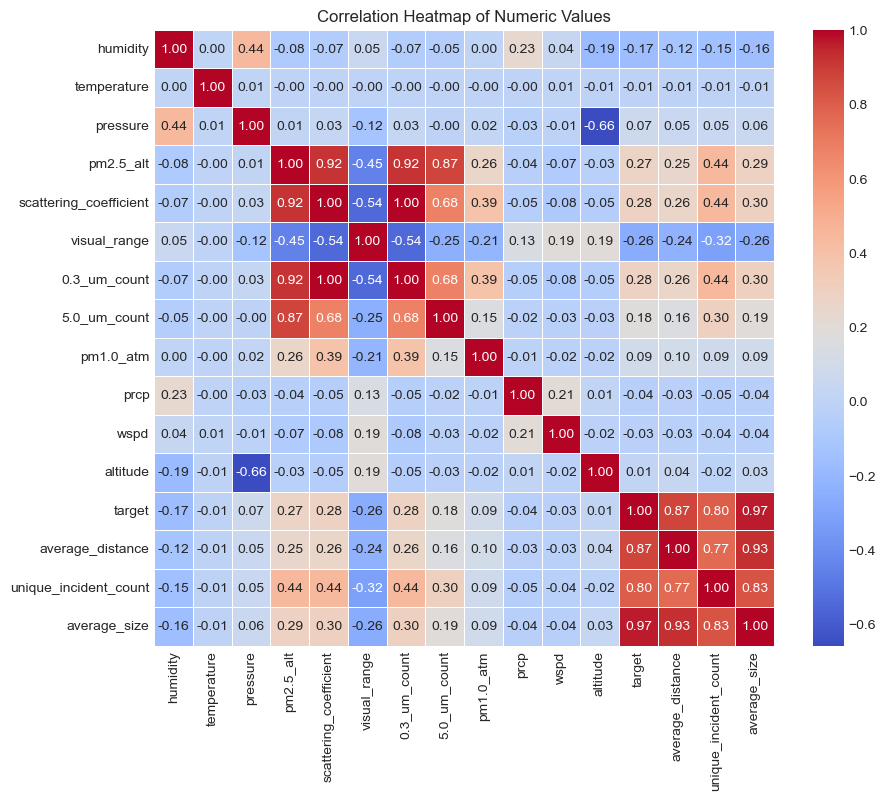

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Values')
plt.show()


In [381]:
subset_df.isna().sum()

date                          0
humidity                      0
temperature                   0
pressure                      0
pm2.5_alt                     0
scattering_coefficient        0
visual_range                  0
0.3_um_count                  0
5.0_um_count                  0
pm1.0_atm                     0
pm2.5_atm                     0
pm2.5_cf_1                    0
pm10.0_atm                    0
sensor_id                     0
last_modified                 0
sensor_date_created           0
sensor_last_seen              0
private                       0
name                          0
location_type                 0
model                         0
hardware                      0
uptime                        0
pa_latency                    0
memory                        0
position_rating               0
sensor_latitude               0
sensor_longitude              0
altitude                      0
tavg                          0
tmin                          0
tmax    

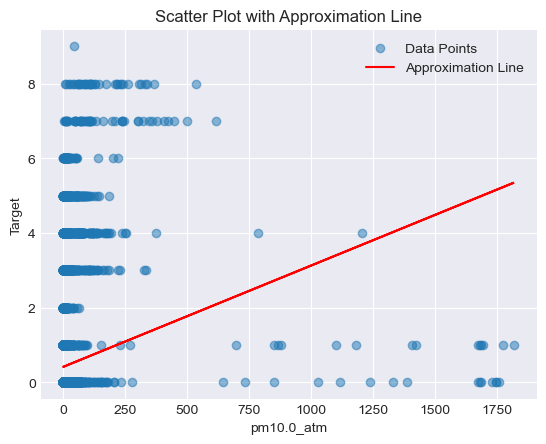

In [396]:
import matplotlib.pyplot as plt
import numpy as np

humidity = subset_df['pm10.0_atm']
target = subset_df['unique_incident_count']

# Create a scatter plot
plt.scatter(humidity, target, alpha=0.5, label='Data Points')

# Fit a linear approximation line
coefficients = np.polyfit(humidity, target, 1)
approx_line = np.polyval(coefficients, humidity)

# Plot the approximation line
plt.plot(humidity, approx_line, color='red', label='Approximation Line')

# Add labels and title
plt.xlabel('pm10.0_atm')
plt.ylabel('Target')
plt.title('Scatter Plot with Approximation Line')

# Show legend
plt.legend()

# Show the plot
plt.show()
